In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Apply formatting to floats
pd.options.display.float_format = '{:20,.2f}'.format
np.random.seed(0)

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
churn = pd.read_csv("telecom_churn_data.csv")
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58280 entries, 0 to 58279
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(212), int64(2), object(12)
memory usage: 100.5+ MB


In [3]:
churn.shape

(58280, 226)

In [4]:
#find data type of each column and number of non null values in each columns
churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58280 entries, 0 to 58279
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             58280 non-null  int64  
 1    circle_id                 58280 non-null  int64  
 2    loc_og_t2o_mou            57675 non-null  float64
 3    std_og_t2o_mou            57675 non-null  float64
 4    loc_ic_t2o_mou            57675 non-null  float64
 5    last_date_of_month_6      58280 non-null  object 
 6    last_date_of_month_7      57909 non-null  object 
 7    last_date_of_month_8      57634 non-null  object 
 8    last_date_of_month_9      57302 non-null  object 
 9    arpu_6                    58279 non-null  float64
 10   arpu_7                    58279 non-null  float64
 11   arpu_8                    58279 non-null  float64
 12   arpu_9                    58279 non-null  float64
 13   onnet_mou_6               55987 non-null  fl

In [5]:
#percentage of null values in each column
round(100*(churn.isnull().sum()/len(churn.index)),2)

mobile_number                    0.00
circle_id                        0.00
loc_og_t2o_mou                   1.04
std_og_t2o_mou                   1.04
loc_ic_t2o_mou                   1.04
                         ...         
aon                              0.00
aug_vbc_3g                       0.00
jul_vbc_3g                       0.00
jun_vbc_3g                       0.00
sep_vbc_3g                       0.00
Length: 226, dtype: float64

In [6]:
#Lets understand the distribution of numeric columns
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"58,280.00","58,280.00","57,675.00","57,675.00","57,675.00","58,279.00","58,279.00","58,279.00","58,279.00","55,987.00",...,"58,279.00","14,703.00","14,949.00","15,400.00","15,126.00","58,279.00","58,279.00","58,279.00","58,279.00","58,279.00"
mean,"7,001,204,992.79",109.00,0.00,0.00,0.00,282.74,277.72,279.12,261.76,130.59,...,0.09,0.91,0.91,0.89,0.86,"1,221.57",68.59,66.60,59.72,3.34
std,"695,279.05",0.00,0.00,0.00,0.00,335.77,343.59,349.38,350.90,292.00,...,0.67,0.28,0.29,0.31,0.35,954.24,263.55,265.84,251.90,33.74
min,"7,000,000,074.00",109.00,0.00,0.00,0.00,"-2,041.23","-2,014.05",-945.81,"-1,899.51",0.00,...,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00
25%,"7,000,602,654.00",109.00,0.00,0.00,0.00,93.54,87.66,84.51,63.33,7.36,...,0.00,1.00,1.00,1.00,1.00,469.00,0.00,0.00,0.00,0.00
50%,"7,001,200,176.50",109.00,0.00,0.00,0.00,197.35,191.24,192.65,177.45,34.33,...,0.00,1.00,1.00,1.00,1.00,867.00,0.00,0.00,0.00,0.00
75%,"7,001,809,011.75",109.00,0.00,0.00,0.00,371.31,364.60,368.77,352.79,117.68,...,0.00,1.00,1.00,1.00,1.00,"1,814.00",0.00,0.00,0.00,0.00
max,"7,002,410,895.00",109.00,0.00,0.00,0.00,"27,731.09","35,145.83","33,543.62","38,805.62","6,504.34",...,49.00,1.00,1.00,1.00,1.00,"4,337.00","8,214.95","7,237.78","11,166.21","2,618.57"


In [7]:
#no. of unique values in each column
churn.nunique()

mobile_number     58280
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
                  ...  
aon                3431
aug_vbc_3g         9023
jul_vbc_3g         8717
jun_vbc_3g         8186
sep_vbc_3g         2428
Length: 226, dtype: int64

__Summary:__
1. There are total 99999 rows and 226 columns in churn.
2. There are some columns having greater than 70% null values.
3. Also, there are some columns having only one or two unique value.
4. mobile number is unique in all the records.
6. Also, there are outliers in some columns. We need to analyse these columns further.
7. There are columns having NAN & only one unique value.

In [8]:
#Drop the columns where all entries are na
filtered_data = churn.dropna(axis=1, how='all')
print("Number of columns after dropping columns with all NAs: ", len(filtered_data.columns))

Number of columns after dropping columns with all NAs:  226


Filling NAs with 0 for the respective column

In [11]:
filtered_data['total_rech_data_6']=filtered_data['total_rech_data_6'].fillna(0)
filtered_data['total_rech_data_7']=filtered_data['total_rech_data_7'].fillna(0)
filtered_data['total_rech_data_8']=filtered_data['total_rech_data_8'].fillna(0)
filtered_data['total_rech_data_9']=filtered_data['total_rech_data_9'].fillna(0)

In [12]:
filtered_data['date_of_last_rech_data_6']=filtered_data['date_of_last_rech_data_6'].fillna(0)
filtered_data['date_of_last_rech_data_7']=filtered_data['date_of_last_rech_data_7'].fillna(0)
filtered_data['date_of_last_rech_data_8']=filtered_data['date_of_last_rech_data_8'].fillna(0)
filtered_data['date_of_last_rech_data_9']=filtered_data['date_of_last_rech_data_9'].fillna(0)

In [13]:
filtered_data['max_rech_data_6']=filtered_data['max_rech_data_6'].fillna(0)
filtered_data['max_rech_data_7']=filtered_data['max_rech_data_7'].fillna(0)
filtered_data['max_rech_data_8']=filtered_data['max_rech_data_8'].fillna(0)
filtered_data['max_rech_data_9']=filtered_data['max_rech_data_9'].fillna(0)

In [14]:
filtered_data['av_rech_amt_data_6']=filtered_data['av_rech_amt_data_6'].fillna(0)
filtered_data['av_rech_amt_data_7']=filtered_data['av_rech_amt_data_7'].fillna(0)
filtered_data['av_rech_amt_data_8']=filtered_data['av_rech_amt_data_8'].fillna(0)
filtered_data['av_rech_amt_data_9']=filtered_data['av_rech_amt_data_9'].fillna(0)

In [15]:
filtered_data['total_rech_data_amt_6'] = filtered_data['av_rech_amt_data_6'] * filtered_data['total_rech_data_6']

filtered_data['total_rech_data_amt_7'] = filtered_data['av_rech_amt_data_7'] * filtered_data['total_rech_data_7']

filtered_data['total_rech_data_amt_8'] = filtered_data['av_rech_amt_data_8'] * filtered_data['total_rech_data_8']

filtered_data['total_rech_data_amt_9'] = filtered_data['av_rech_amt_data_9'] * filtered_data['total_rech_data_9']

In [17]:
filtered_data.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
              'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

In [21]:
avg_rech_6n7 = (filtered_data['total_rech_amt_6'].fillna(0)
+ filtered_data['total_rech_amt_7'].fillna(0)
+ filtered_data['total_rech_data_amt_6'].fillna(0)
+ filtered_data['total_rech_data_amt_7'].fillna(0))/2

Lets take 70th percentile

In [22]:
perc_70_6n7 = np.percentile(avg_rech_6n7, 70.0)
print("70 percentile is : ", perc_70_6n7)

70 percentile is :  476.5


In [24]:
filtered_data = filtered_data[avg_rech_6n7 >= perc_70_6n7]
print("Dimension of filtered data set", filtered_data.shape)

Dimension of filtered data set (17495, 222)


#### 1.3.3 Tag churners
- Tag churners and remove attributes of the churn phase.
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase


- The attributes to be used for tagging churners are:

    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [25]:
#Check if any of the columns used to calculate churn have null values
for column in ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']:
    if filtered_data[column].isnull().any():
           print('{0}: {1}'.format(column, filtered_data[column].isnull().sum()))

In [26]:
filtered_data['last_month_usage']=filtered_data['total_ic_mou_9']+filtered_data['total_og_mou_9']+filtered_data['vol_2g_mb_9']+filtered_data['vol_3g_mb_9']
filtered_data['churn'] = np.where(filtered_data['last_month_usage']>0, 0, 1)

In [27]:
#Drop columns used for churn
filtered_data=filtered_data.drop(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','last_month_usage'], axis=1)
print("Number of columns: ", len(filtered_data.columns))

Number of columns:  219


In [28]:
#Drop other columns for last month(9/September)
last_mnth_cols = [x for x in filtered_data.columns if "9" in x or "sep" in x]
filtered_data = filtered_data.drop(last_mnth_cols,axis=1)
print("Number of columns: ", len(filtered_data.columns))

Number of columns:  169


Create Dummy variables

In [29]:
filtered_data.nunique().sort_values(ascending=True)

std_og_t2c_mou_6        1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
                    ...  
total_og_mou_7      14801
arpu_8              16529
arpu_6              17061
arpu_7              17075
mobile_number       17495
Length: 169, dtype: int64

#### These are the Categorical Variables which have only two counts 0 and 1.
1. _night_pck_user_6
2. _night_pck_user_7
3. _night_pck_user_8
4. _night_pck_user_9
5. _fb_user_6
6. _fb_user_7
7. _fb_user_8
8. _fb_user_9

In [30]:
print(filtered_data['night_pck_user_6'].value_counts())
print(filtered_data['night_pck_user_7'].value_counts())
print(filtered_data['night_pck_user_8'].value_counts())
print(filtered_data['fb_user_6'].value_counts())
print(filtered_data['fb_user_7'].value_counts())
print(filtered_data['fb_user_8'].value_counts())

0.00    9558
1.00     228
Name: night_pck_user_6, dtype: int64
0.00    9741
1.00     215
Name: night_pck_user_7, dtype: int64
0.00    9139
1.00     189
Name: night_pck_user_8, dtype: int64
1.00    9054
0.00     732
Name: fb_user_6, dtype: int64
1.00    9163
0.00     793
Name: fb_user_7, dtype: int64
1.00    8373
0.00     955
Name: fb_user_8, dtype: int64


In [31]:
def create_dummy(feature,filtered_df):
    dummy = pd.get_dummies(filtered_df[feature], prefix=feature,drop_first = True)
    # Add the results to the original filtered_df dataframe
    filtered_df[feature] = dummy
    return filtered_df

In [33]:
categorical_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
for col in categorical_cols:
  filtered_data = create_dummy(col, filtered_data)

Data cleaning

Drop the columns with only 1 distinct value

In [34]:
#Drop the columns with only 1 distinct value
filtered_data = filtered_data.loc[:,filtered_data.apply(pd.Series.nunique) != 1]
print("Number of columns after dropping columns with only 1 distinct value: ", len(filtered_data.columns))

Number of columns after dropping columns with only 1 distinct value:  156


In [35]:
#drop all the columns with greater than 60% of NA values
filtered_data = filtered_data.dropna(thresh=int(filtered_data.shape[0]*.60), axis=1)
print("Number of columns after dropping columns with > 60% NAs: ", len(filtered_data.columns))

Number of columns after dropping columns with > 60% NAs:  144


In [36]:
filtered_data.describe(include = 'all')

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
count,"17,495.00","17,495.00","17,495.00","17,495.00","17,189.00","17,177.00","16,838.00","17,189.00","17,177.00","16,838.00",...,"17,495.00","17,495.00","17,495.00","17,495.00","17,495.00","17,495.00","17,495.00","17,495.00","17,495.00","17,495.00"
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,"7,001,209,727.44",557.76,557.99,508.35,261.15,270.11,241.35,381.54,385.04,351.71,...,0.52,0.48,"1,213.21",169.69,177.25,156.54,462.73,521.72,468.93,0.08
std,"692,439.89",478.02,494.98,514.57,453.03,482.74,468.69,489.91,502.44,490.01,...,0.50,0.50,956.06,412.68,432.86,413.38,"1,583.23","1,405.36","1,664.53",0.27
min,"7,000,000,074.00","-2,041.23","-2,014.05",-945.81,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,180.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"7,000,609,620.50",307.87,310.84,233.45,19.48,18.43,14.41,79.29,78.29,58.39,...,0.00,0.00,465.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"7,001,212,258.00",478.82,479.79,429.85,87.91,87.84,72.69,231.74,229.36,199.76,...,1.00,0.00,858.00,0.00,0.00,0.00,92.00,100.00,25.00,0.00
75%,"7,001,810,004.00",696.38,693.76,662.65,292.54,292.26,251.07,493.56,496.59,456.75,...,1.00,1.00,"1,759.50",128.75,137.82,98.78,400.00,575.00,342.00,0.00


Remove rows with null values

In [37]:
#Rows with all values null
filtered_data.isnull().all(axis=1).sum()
print("Number of rows after dropping NAs: ", filtered_data.shape[0])

Number of rows after dropping NAs:  17495


In [38]:
# Count of rows with misisng values count in them
missing_values_in_rows = [x for x in filtered_data.isnull().sum(axis=1) if x>0]
np.unique(missing_values_in_rows, return_counts=True)

(array([ 1,  2, 27, 28, 29, 54, 55, 56, 81, 82, 83]),
 array([190,  12, 422, 132,   7, 102,  35,  16, 119,  14,   5]))

As seen above, there are many rows with missing values, few with 1 or 2 missing values and many with >=27 missing values. Drop all the rows with many missing values.

In [39]:
#Drop these rows
filtered_data = filtered_data[filtered_data.isnull().sum(axis=1) <= 2]
print("Number of rows: ", filtered_data.shape[0])

Number of rows:  16643


Fix date columns

In [40]:
date_cols = [x for x in filtered_data.columns if "date" in x ]
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [41]:
filtered_data = filtered_data.drop(date_cols, axis=1)

Imput missing values

Fetch columns with null values

In [42]:
c = round(100*(filtered_data.isnull().sum()/len(filtered_data.index)), 2)
c[c > 0]

Series([], dtype: float64)

Outlier treatment

In [44]:
print("Number of rows before outlier treatment: ", filtered_data.shape[0])

Number of rows before outlier treatment:  16643


In [45]:
categorical=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','churn', 'week_of_last_rech_6', 'week_of_last_rech_7', 'week_of_last_rech_8']
numerical=[col for col in filtered_data if col not in categorical]

In [46]:
def removeOutliers(filtered_data, cols):
    for col in cols:
        Q1 = filtered_data[col].quantile(0.25)
        Q3 = filtered_data[col].quantile(0.99)
        IQR = Q3 - Q1
        filtered_data = filtered_data[((filtered_data[col] >= (Q1 - 1.5 * IQR)) &(filtered_data[col]<= (Q3 + 1.5 * IQR)))]
    return filtered_data

In [47]:
filtered_data = removeOutliers(filtered_data, numerical)

In [48]:
print("Number of rows after outlier treatment: ", filtered_data.shape[0])


Number of rows after outlier treatment:  14945


# EDA exploratory Data Analysis

Checking class imbalance

In [51]:
#Counting churn and non-churn numbers to check class balance
non_churn=filtered_data['churn'].value_counts()[0]
churn=filtered_data['churn'].value_counts()[1]
churn_percentage=(churn*100)/(churn+non_churn)
print('Churn percentage is:',churn_percentage)


Churn percentage is: 5.506858481097357


In [52]:
churn_df=filtered_data.loc[filtered_data['churn']==1]
non_churn_df=filtered_data.loc[filtered_data['churn']==0]
print('Rows in churn df : ',len(churn_df))
print('Rows in non-churn df : ',len(non_churn_df))

Rows in churn df :  823
Rows in non-churn df :  14122


Text(0.5, 1.0, 'Imbalance ratio\n')

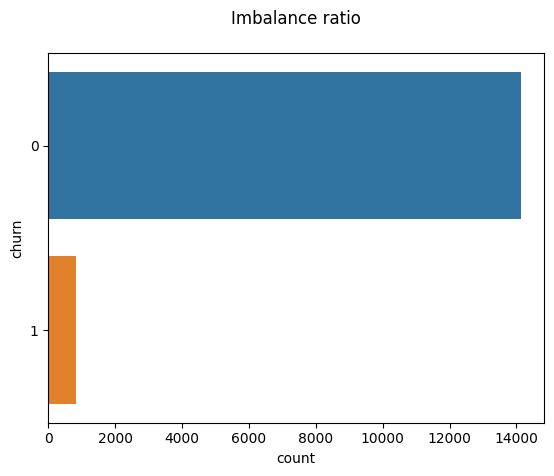

In [54]:
sns.countplot(y='churn',data=filtered_data)
plt.title('Imbalance ratio\n')

Univariate Analysis

Text(0, 0.5, 'age')

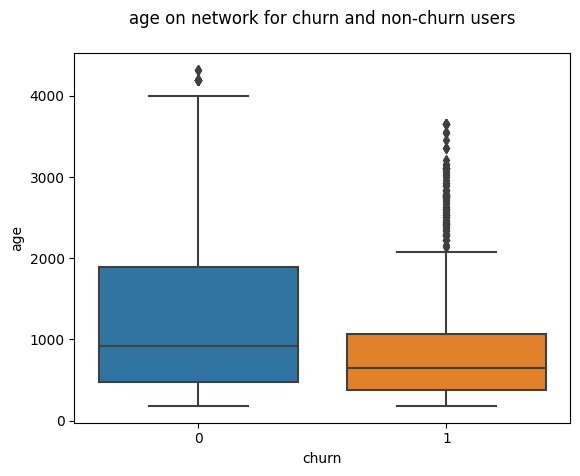

In [56]:
#boxplot for age on network
sns.boxplot(x='churn',y='aon',data=filtered_data)
plt.title('age on network for churn and non-churn users\n')
plt.ylabel('age')

Both lower and upper limit for Age on network is less for churn customers

EDA for action phase

Text(0.5, 1.0, 'outgoing minutes of usage for churn and non-churn users\n')

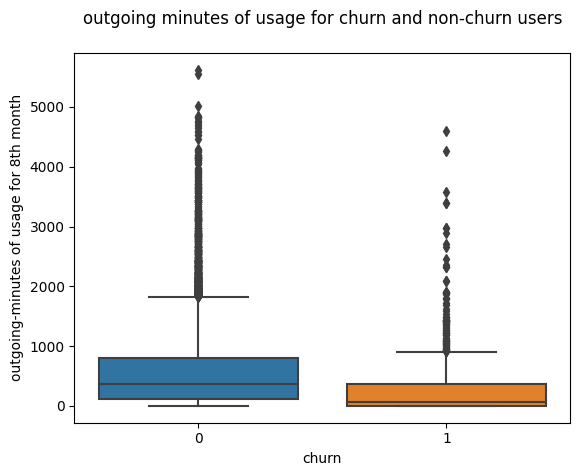

In [57]:

sns.boxplot(x='churn',y='total_og_mou_8',data=filtered_data)
plt.ylabel('outgoing-minutes of usage for 8th month')
plt.title('outgoing minutes of usage for churn and non-churn users\n')

Both Lower and Upper limit of outgoing minutes for churn is less than that of non-churn users.

Median of is also lower for churn

Text(0.5, 1.0, 'total recharge for churn and non-churn users\n')

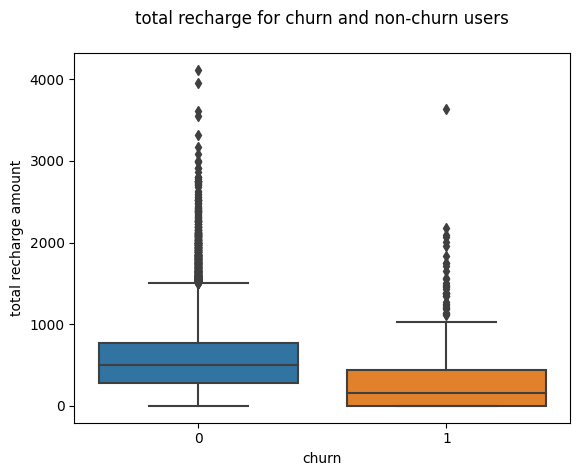

In [61]:
#Boxplot for 8th month total recharge

sns.boxplot(x='churn',y='total_rech_amt_8',data=filtered_data)
plt.ylabel("total recharge amount")
plt.title('total recharge for churn and non-churn users\n')

Total recharge for 8 months is more for the non churn customers

Text(0.5, 1.0, 'incoming minutes of usage for churn and non-churn users\n')

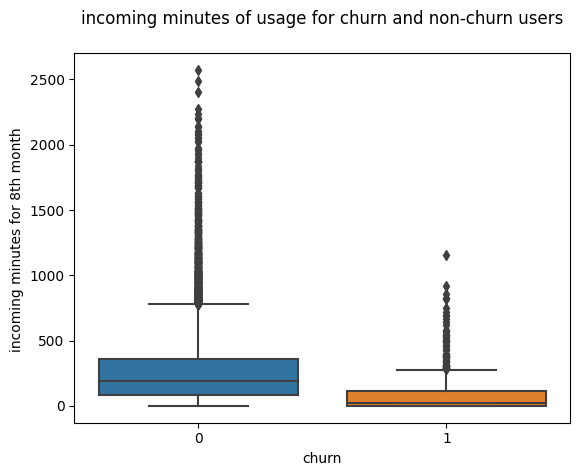

In [63]:
# plotting for incoming minutes for 8 th month
sns.boxplot(x='churn',y='total_ic_mou_8',data=filtered_data)
plt.ylabel("incoming minutes for 8th month ")
plt.title('incoming minutes of usage for churn and non-churn users\n')

the incoming minutes for 8th month for churned customer is less as compared to the non churn customrers

EDA for all three months

Text(0, 0.5, 'average revenue per person')

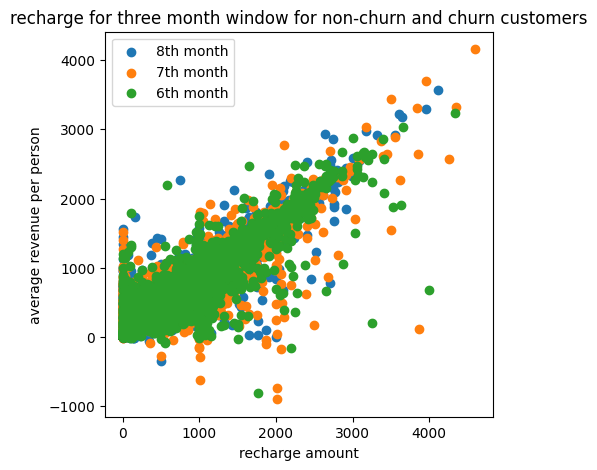

In [65]:
plt.figure(figsize=(5,5))
plt.scatter(x='total_rech_amt_8',y='arpu_8',data=filtered_data,label='8th month')
plt.scatter(x='total_rech_amt_7',y='arpu_7',data=filtered_data,label='7th month')
plt.scatter(x='total_rech_amt_6',y='arpu_6',data=filtered_data,label='6th month')
plt.legend(loc='best')
plt.title('recharge for three month window for non-churn and churn customers')
plt.xlabel('recharge amount')
plt.ylabel('average revenue per person')

Inferences From above two graphs we can observe that for churn customers range of average revenue per user and total recharge for three window is less than that of non-churn customers.

Text(0, 0.5, 'average revenue per person')

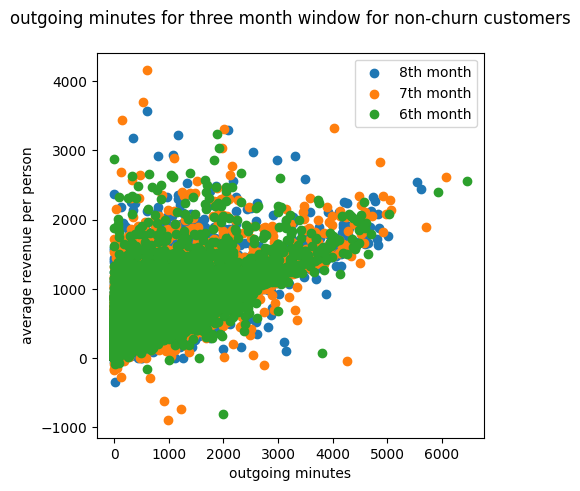

In [66]:
#scatter plot for non-churn customers
plt.figure(figsize=(5,5))
plt.scatter(x='total_og_mou_8',y='arpu_8',data=filtered_data,label='8th month')
plt.scatter(x='total_og_mou_7',y='arpu_7',data=filtered_data,label='7th month')
plt.scatter(x='total_og_mou_6',y='arpu_6',data=filtered_data,label='6th month')
plt.legend(loc='best')
plt.title('outgoing minutes for three month window for non-churn customers\n')
plt.xlabel('outgoing minutes')
plt.ylabel('average revenue per person')

Inferences From above two graphs we can observe that for churn customers range of average revenue per user and outgoing for three window is less than that of non-churn customers.

Text(0, 0.5, 'incoming minutes ')

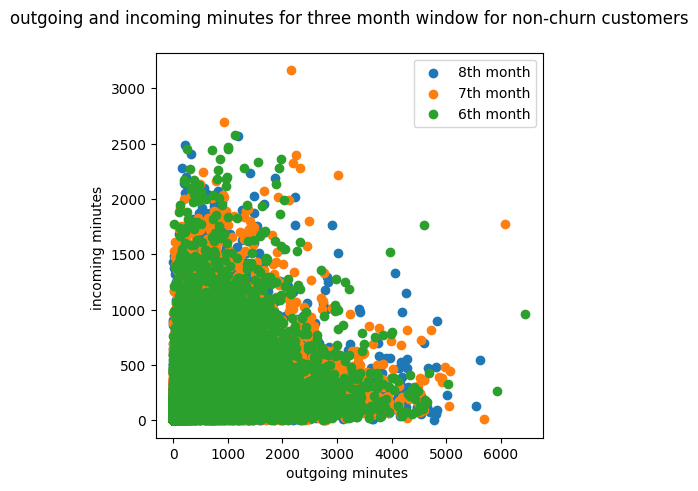

In [69]:
#scatter plot for non-churn customers
plt.figure(figsize=(5,5))
plt.scatter(x='total_og_mou_8',y='total_ic_mou_8',data=filtered_data,label='8th month')
plt.scatter(x='total_og_mou_7',y='total_ic_mou_7',data=filtered_data,label='7th month')
plt.scatter(x='total_og_mou_6',y='total_ic_mou_6',data=filtered_data,label='6th month')

plt.legend(loc='best')
plt.title('outgoing and incoming minutes for three month window for non-churn customers\n')
plt.xlabel('outgoing minutes ')
plt.ylabel('incoming minutes ')

Inferences

From above two graphs we can observe that for churn customers range of average revenue per user and outgoing for three window is less than that of non-churn customers.

Text(0, 0.5, '3g data in mb')

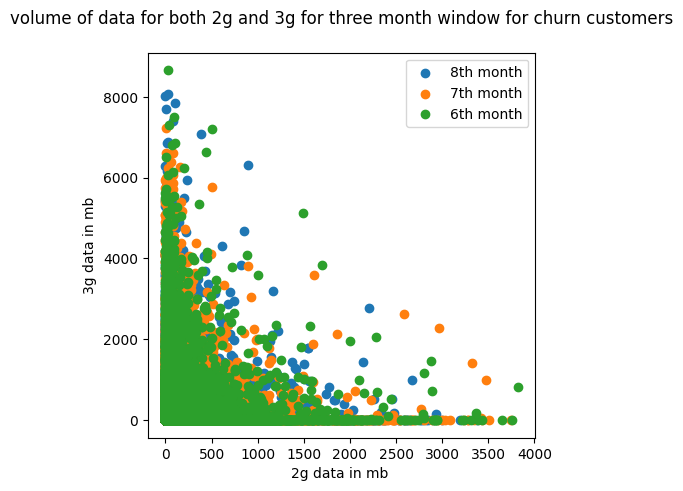

In [72]:
plt.figure(figsize=(5,5))
plt.scatter(x='vol_2g_mb_8',y='vol_3g_mb_8',data=filtered_data,label='8th month')
plt.scatter(x='vol_2g_mb_7',y='vol_3g_mb_7',data=filtered_data,label='7th month')
plt.scatter(x='vol_2g_mb_6',y='vol_3g_mb_6',data=filtered_data,label='6th month')

plt.legend(loc='best')
plt.title('volume of data for both 2g and 3g for three month window for churn customers\n')
plt.xlabel('2g data in mb ')
plt.ylabel('3g data in mb')

In [73]:
# calculating fb users for all months for non_churn
fb0=filtered_data[['fb_user_6','fb_user_7','fb_user_8']].sum()
fb0

fb_user_6    7681
fb_user_7    7830
fb_user_8    7240
dtype: int64

Text(0.5, 1.0, 'Total number of facebook users for three months window(non-churn users)\n  ')

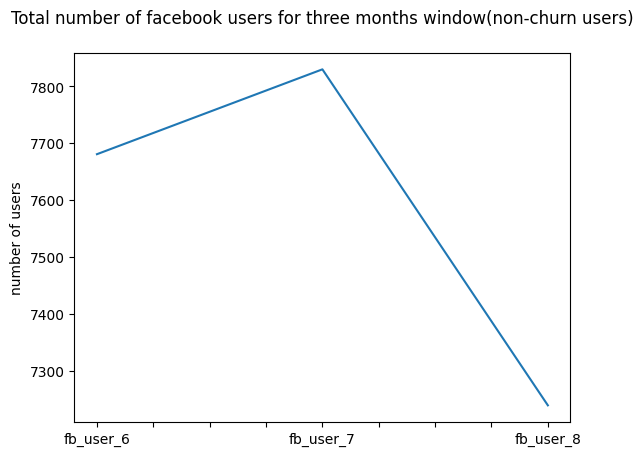

In [74]:
fb0.plot()
plt.ylabel('number of users')

plt.title('Total number of facebook users for three months window(non-churn users)\n  ')

## Model Building

In [75]:
# Putting feature variable to X
X = filtered_data.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = filtered_data['churn']

In [76]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

Rescaling of features

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [79]:
categorical=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','week_of_last_rech_8','week_of_last_rech_7','week_of_last_rech_6','churn']
numerical=[col for col in X_train if col not in categorical]

In [80]:
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
count,"10,461.00","10,461.00","10,461.00","10,461.00","10,461.00","10,461.00","10,461.00","10,461.00","10,461.00","10,461.00",...,"10,461.00","10,461.00","10,461.00","10,461.00","10,461.00","10,461.00","10,461.00","10,461.00","10,461.00","10,461.00"
mean,0.36,0.26,0.14,0.06,0.06,0.05,0.07,0.07,0.07,0.01,...,0.51,0.52,0.48,0.25,0.04,0.04,0.03,0.04,0.04,0.03
std,0.09,0.07,0.10,0.10,0.10,0.09,0.09,0.09,0.09,0.06,...,0.50,0.50,0.50,0.23,0.09,0.09,0.09,0.08,0.08,0.08
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.30,0.21,0.07,0.00,0.00,0.00,0.02,0.02,0.01,0.00,...,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.35,0.25,0.12,0.02,0.02,0.02,0.04,0.04,0.04,0.00,...,1.00,1.00,0.00,0.17,0.00,0.00,0.00,0.01,0.01,0.00
75%,0.40,0.29,0.18,0.07,0.07,0.06,0.10,0.09,0.09,0.00,...,1.00,1.00,1.00,0.39,0.03,0.03,0.02,0.04,0.05,0.03
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [81]:
#Scale test data as well
X_test[numerical] = scaler.transform(X_test[numerical])
X_test.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
count,"4,484.00","4,484.00","4,484.00","4,484.00","4,484.00","4,484.00","4,484.00","4,484.00","4,484.00","4,484.00",...,"4,484.00","4,484.00","4,484.00","4,484.00","4,484.00","4,484.00","4,484.00","4,484.00","4,484.00","4,484.00"
mean,0.36,0.26,0.14,0.06,0.06,0.05,0.07,0.07,0.06,0.02,...,0.51,0.53,0.49,0.26,0.04,0.04,0.03,0.04,0.04,0.03
std,0.09,0.07,0.10,0.09,0.10,0.09,0.09,0.09,0.09,0.07,...,0.50,0.50,0.50,0.23,0.09,0.08,0.08,0.08,0.08,0.08
min,0.20,-0.03,-0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.30,0.22,0.07,0.00,0.01,0.00,0.01,0.01,0.01,0.00,...,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.35,0.25,0.12,0.02,0.02,0.02,0.04,0.04,0.04,0.00,...,1.00,1.00,0.00,0.17,0.00,0.00,0.00,0.01,0.01,0.00
75%,0.40,0.29,0.18,0.07,0.07,0.06,0.09,0.09,0.08,0.00,...,1.00,1.00,1.00,0.40,0.03,0.03,0.02,0.04,0.04,0.02
max,1.10,0.85,0.93,1.05,0.92,1.09,0.87,0.95,0.92,0.99,...,1.00,1.00,1.00,0.97,0.99,1.04,1.01,0.92,1.00,0.85


Handle class imbalance

In [82]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)

(19762, 136)
(19762,)


9881

In [83]:
print("Percentage of churn observations after handling class imbalance: ", y_tr.sum()*100/y_tr.shape[0])
print("Train data size before applying smote: ", X_train.shape)
print("Train data size after applying smote: ", X_tr.shape)

Percentage of churn observations after handling class imbalance:  50.0
Train data size before applying smote:  (10461, 136)
Train data size after applying smote:  (19762, 136)


## Run first model logistic regression

In [84]:
import statsmodels.api as sm

In [85]:
# Logistic regression model
X_tr_sm = sm.add_constant(X_tr)
logm1 = sm.GLM(y_tr,X_tr_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19762
Model:                            GLM   Df Residuals:                    19627
Model Family:                Binomial   Df Model:                          134
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7097.3
Date:                Mon, 06 Nov 2023   Deviance:                       14195.
Time:                        06:35:30   Pearson chi2:                 3.60e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4873
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.4170      0.388      6.224      0.000       1.656       3.178
arpu_6                   -3.1281      1.097     -2.851      0.004      -5.278      -0.978
arpu_7                   -0.5180      1.709     -0.303      0.762      -3.867       2.831
arpu_8                    9.1954      1.199      7.669      0.000       6.845      11.545
onnet_mou_6            -171.5544     47.789     -3.590      0.000    -265.218     -77.890
onnet_mou_7             164.0325     33.986      4.827      0.000      97.422     230.643
onnet_mou_8             -16.9100     36.933     -0.458      0.647     -89.298      55.478
offnet_mou_6           -192.3373     56.960     -3.377      0.001    -303.976     -80.698
offnet_mou_7            204.4718     41.908      4.879      0.000     122.334     286.609
offnet_mou_8            -37.4973     43.510     -0.862      0.389    -122.775      47.780
roam_ic_mou_6            -1.1918      0.721     -1.653      0.098      -2.605       0.221
roam_ic_mou_7             3.1625      0.688      4.594      0.000       1.813       4.512
roam_ic_mou_8            -3.4184      0.593     -5.763      0.000      -4.581      -2.256
roam_og_mou_6            44.2022     12.861      3.437      0.001      18.995      69.409
roam_og_mou_7           -34.6306      7.471     -4.635      0.000     -49.274     -19.987
roam_og_mou_8             6.5572      7.342      0.893      0.372      -7.833      20.948
loc_og_t2t_mou_6       5.652e+04   1.09e+04      5.162      0.000    3.51e+04     7.8e+04
loc_og_t2t_mou_7      -1.833e+04   1.03e+04     -1.785      0.074   -3.85e+04    1800.904
loc_og_t2t_mou_8       2.214e+04   8902.184      2.487      0.013    4687.850    3.96e+04
loc_og_t2m_mou_6       5.902e+04   1.14e+04      5.161      0.000    3.66e+04    8.14e+04
loc_og_t2m_mou_7      -1.955e+04    1.1e+04     -1.785      0.074    -4.1e+04    1919.479
loc_og_t2m_mou_8       2.775e+04   1.12e+04      2.487      0.013    5882.460    4.96e+04
loc_og_t2f_mou_6       4561.8927    883.037      5.166      0.000    2831.172    6292.614
loc_og_t2f_mou_7      -1433.3939    799.928     -1.792      0.073   -3001.223     134.436
loc_og_t2f_mou_8       2188.4924    879.529      2.488      0.013     464.647    3912.338
loc_og_t2c_mou_6         -0.0210      0.436     -0.048      0.961      -0.875       0.833
loc_og_t2c_mou_7         -2.8218      0.531     -5.310      0.000      -3.863      -1.780
loc_og_t2c_mou_8          2.7640      0.520      5.314      0.000       1.744       3.783
loc_og_mou_6          -1.225e+05   1.66e+04     -7.392      0.000   -1.55e+05   -9.01e+04
loc_og_mou_7            2.98e+04    1.9e+04      1.572      0.116   -7362.810     6.7e+04
loc_og_mou_8           5542.6066   1.93e+04      0.287      0.774   -3.24e+04    4.34e+04
std_og_t2t_mou_6      -

In [86]:
#Make predictions on train set
y_train_pred = res.predict(X_tr_sm)
y_train_pred[:10]

0                   0.61
1                   0.02
2                   0.04
3                   0.28
4                   0.00
5                   0.07
6                   0.30
7                   0.17
8                   0.83
9                   0.02
dtype: float64

In [87]:
y_train_pred_final = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.61,1
1,0,0.02,0
2,0,0.04,0
3,0,0.28,0
4,0,0.00,0


In [88]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)
print("Accuracy of train data:", metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print("Recall of train data:", metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

[[8221 1660]
 [1212 8669]]
Accuracy of train data: 0.8546705799008197
Recall of train data: 0.8773403501669872


In [89]:
#Make predictions on test data
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

24492                   0.36
41068                   0.84
29489                   0.00
6780                    0.23
886                     0.41
33418                   0.58
408                     0.11
2560                    0.21
29128                   0.24
9080                    0.01
dtype: float64

In [90]:
#creating a dataframe for test data
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final.head()
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
24492,0,0.36,0
41068,0,0.84,1
29489,0,0.00,0
6780,0,0.23,0
886,0,0.41,0


In [91]:
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)
print("Accuracy of test data:", metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print("Recall of test data:", metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

[[3471  770]
 [  70  173]]
Accuracy of test data: 0.8126672613737734
Recall of test data: 0.7119341563786008


In [92]:
#Other metrics for test data
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("False Positive Rate:", FP/ float(TN+FP))
print("Positive Predictive Value :", TP / float(TP+FP))
print("Negative Predictive Value :", TN / float(TN+FN))

Sensitivity: 0.7119341563786008
Specificity: 0.8184390473944825
False Positive Rate: 0.18156095260551758
Positive Predictive Value : 0.18345705196182396
Negative Predictive Value : 0.9802315730019768


In [93]:
# Let's see the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (20,10))
#sns.heatmap(X_train.corr(),annot = True)
X_train.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
arpu_6,1.00,0.60,0.51,0.45,0.28,0.24,0.60,0.39,0.34,0.12,...,-0.17,-0.25,-0.19,0.07,0.04,0.04,0.10,-0.01,-0.14,-0.08
arpu_7,0.60,1.00,0.67,0.30,0.44,0.37,0.41,0.59,0.47,0.12,...,-0.25,-0.17,-0.16,0.05,0.06,0.07,0.03,-0.13,-0.00,-0.06
arpu_8,0.51,0.67,1.00,0.20,0.30,0.46,0.32,0.43,0.63,0.12,...,-0.18,-0.15,-0.02,0.09,0.15,0.07,0.08,-0.09,-0.06,0.10
onnet_mou_6,0.45,0.30,0.20,1.00,0.76,0.61,0.08,0.04,0.03,0.01,...,-0.31,-0.32,-0.28,-0.04,-0.14,-0.13,-0.12,-0.16,-0.16,-0.15
onnet_mou_7,0.28,0.44,0.30,0.76,1.00,0.80,0.03,0.08,0.07,0.05,...,-0.32,-0.33,-0.28,-0.05,-0.14,-0.14,-0.14,-0.18,-0.16,-0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jul_vbc_3g,0.04,0.07,0.07,-0.13,-0.14,-0.11,-0.12,-0.12,-0.08,-0.02,...,0.31,0.35,0.31,0.03,0.71,1.00,0.69,0.23,0.28,0.20
jun_vbc_3g,0.10,0.03,0.08,-0.12,-0.14,-0.11,-0.11,-0.12,-0.08,-0.02,...,0.34,0.30,0.29,0.04,0.62,0.69,1.00,0.32,0.19,0.19
total_rech_data_amt_6,-0.01,-0.13,-0.09,-0.16,-0.18,-0.15,-0.19,-0.20,-0.16,-0.05,...,0.44,0.35,0.33,-0.07,0.20,0.23,0.32,1.00,0.47,0.43
total_rech_data_amt_7,-0.14,-0.00,-0.06,-0.16,-0.16,-0.15,-0.18,-0.18,-0.15,-0.04,...,0.33,0.43,0.37,-0.07,0.22,0.28,0.19,0.47,1.00,0.54


<Figure size 2000x1000 with 0 Axes>

Even though we got decent result (81% accuracy and 71% recall) from logistic regression on entire data set, as seen in correlation matrix, there are many correlated features. One way to handle this is by reducing the number of features by PCA. PCA will create non-correlated features.

## PCA on the data

In [94]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [95]:
#Doing the PCA on the train data
pca.fit(X_tr)

PCA(random_state=100, svd_solver='randomized')

In [96]:
pca.components_

array([[-3.61453219e-02, -2.23824588e-02, -2.54660423e-03, ...,
         3.92463169e-02,  4.19620849e-02,  3.23925259e-02],
       [ 7.43495951e-02,  9.04659662e-02,  1.82683375e-01, ...,
        -2.24518495e-02,  1.98123355e-03,  3.09071682e-02],
       [ 8.13099920e-02,  3.14622149e-02,  6.44553958e-02, ...,
         1.24596681e-02, -3.19153131e-02, -3.04249445e-02],
       ...,
       [ 1.85231807e-07,  1.70887781e-07,  1.92425012e-07, ...,
         2.39300424e-07, -1.96892044e-07,  2.19967567e-07],
       [ 0.00000000e+00,  3.51340338e-17, -1.46978451e-17, ...,
         4.88875825e-17, -9.11301488e-18, -1.76438143e-16],
       [-0.00000000e+00, -9.08080523e-17,  5.85975095e-17, ...,
         1.03164415e-16,  1.24920600e-16, -7.72777791e-17]])

In [97]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head()

,PC1,PC2,PC3,Feature
0,-0.04,0.07,0.08,arpu_6
1,-0.02,0.09,0.03,arpu_7
2,-0.00,0.18,0.06,arpu_8
3,-0.06,0.02,-0.04,onnet_mou_6
4,-0.05,0.05,-0.04,onnet_mou_7


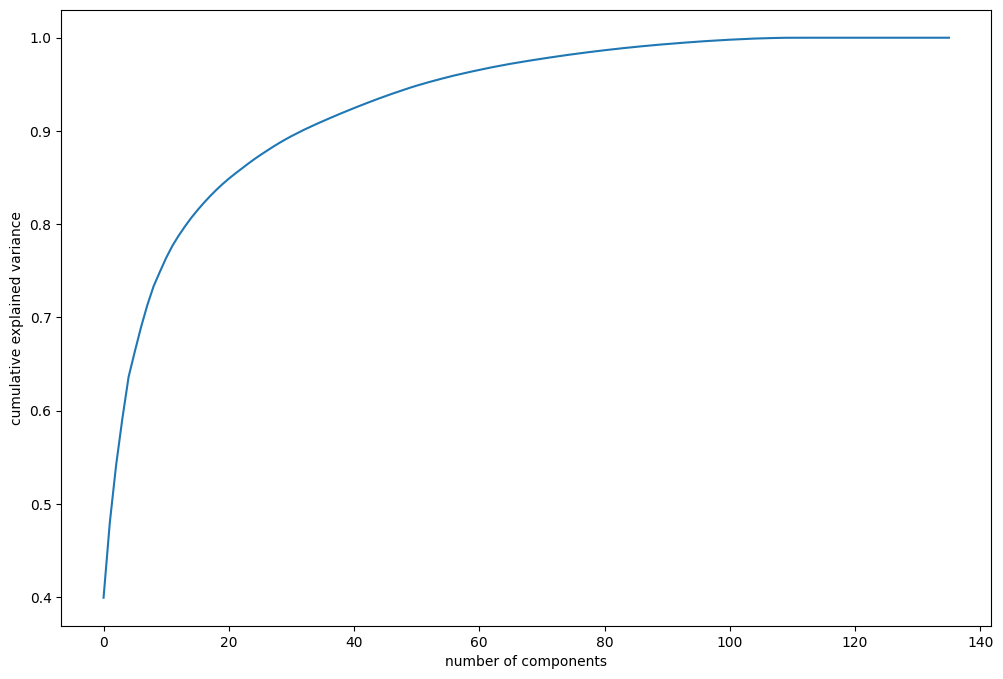

In [98]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like ~58 components are enough to describe 96% of the variance in the dataset
- Let's choose number of features describing 96% of variance

In [102]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
#pca_final = IncrementalPCA(n_components=30)
pca_final = PCA(0.96)

### 4.6.4 Basis transformation - getting the data onto our PCs

In [103]:
df_tr_pca = pca_final.fit_transform(X_tr)
df_tr_pca.shape

(19762, 58)

In [104]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_tr_pca.transpose())

<Axes: >

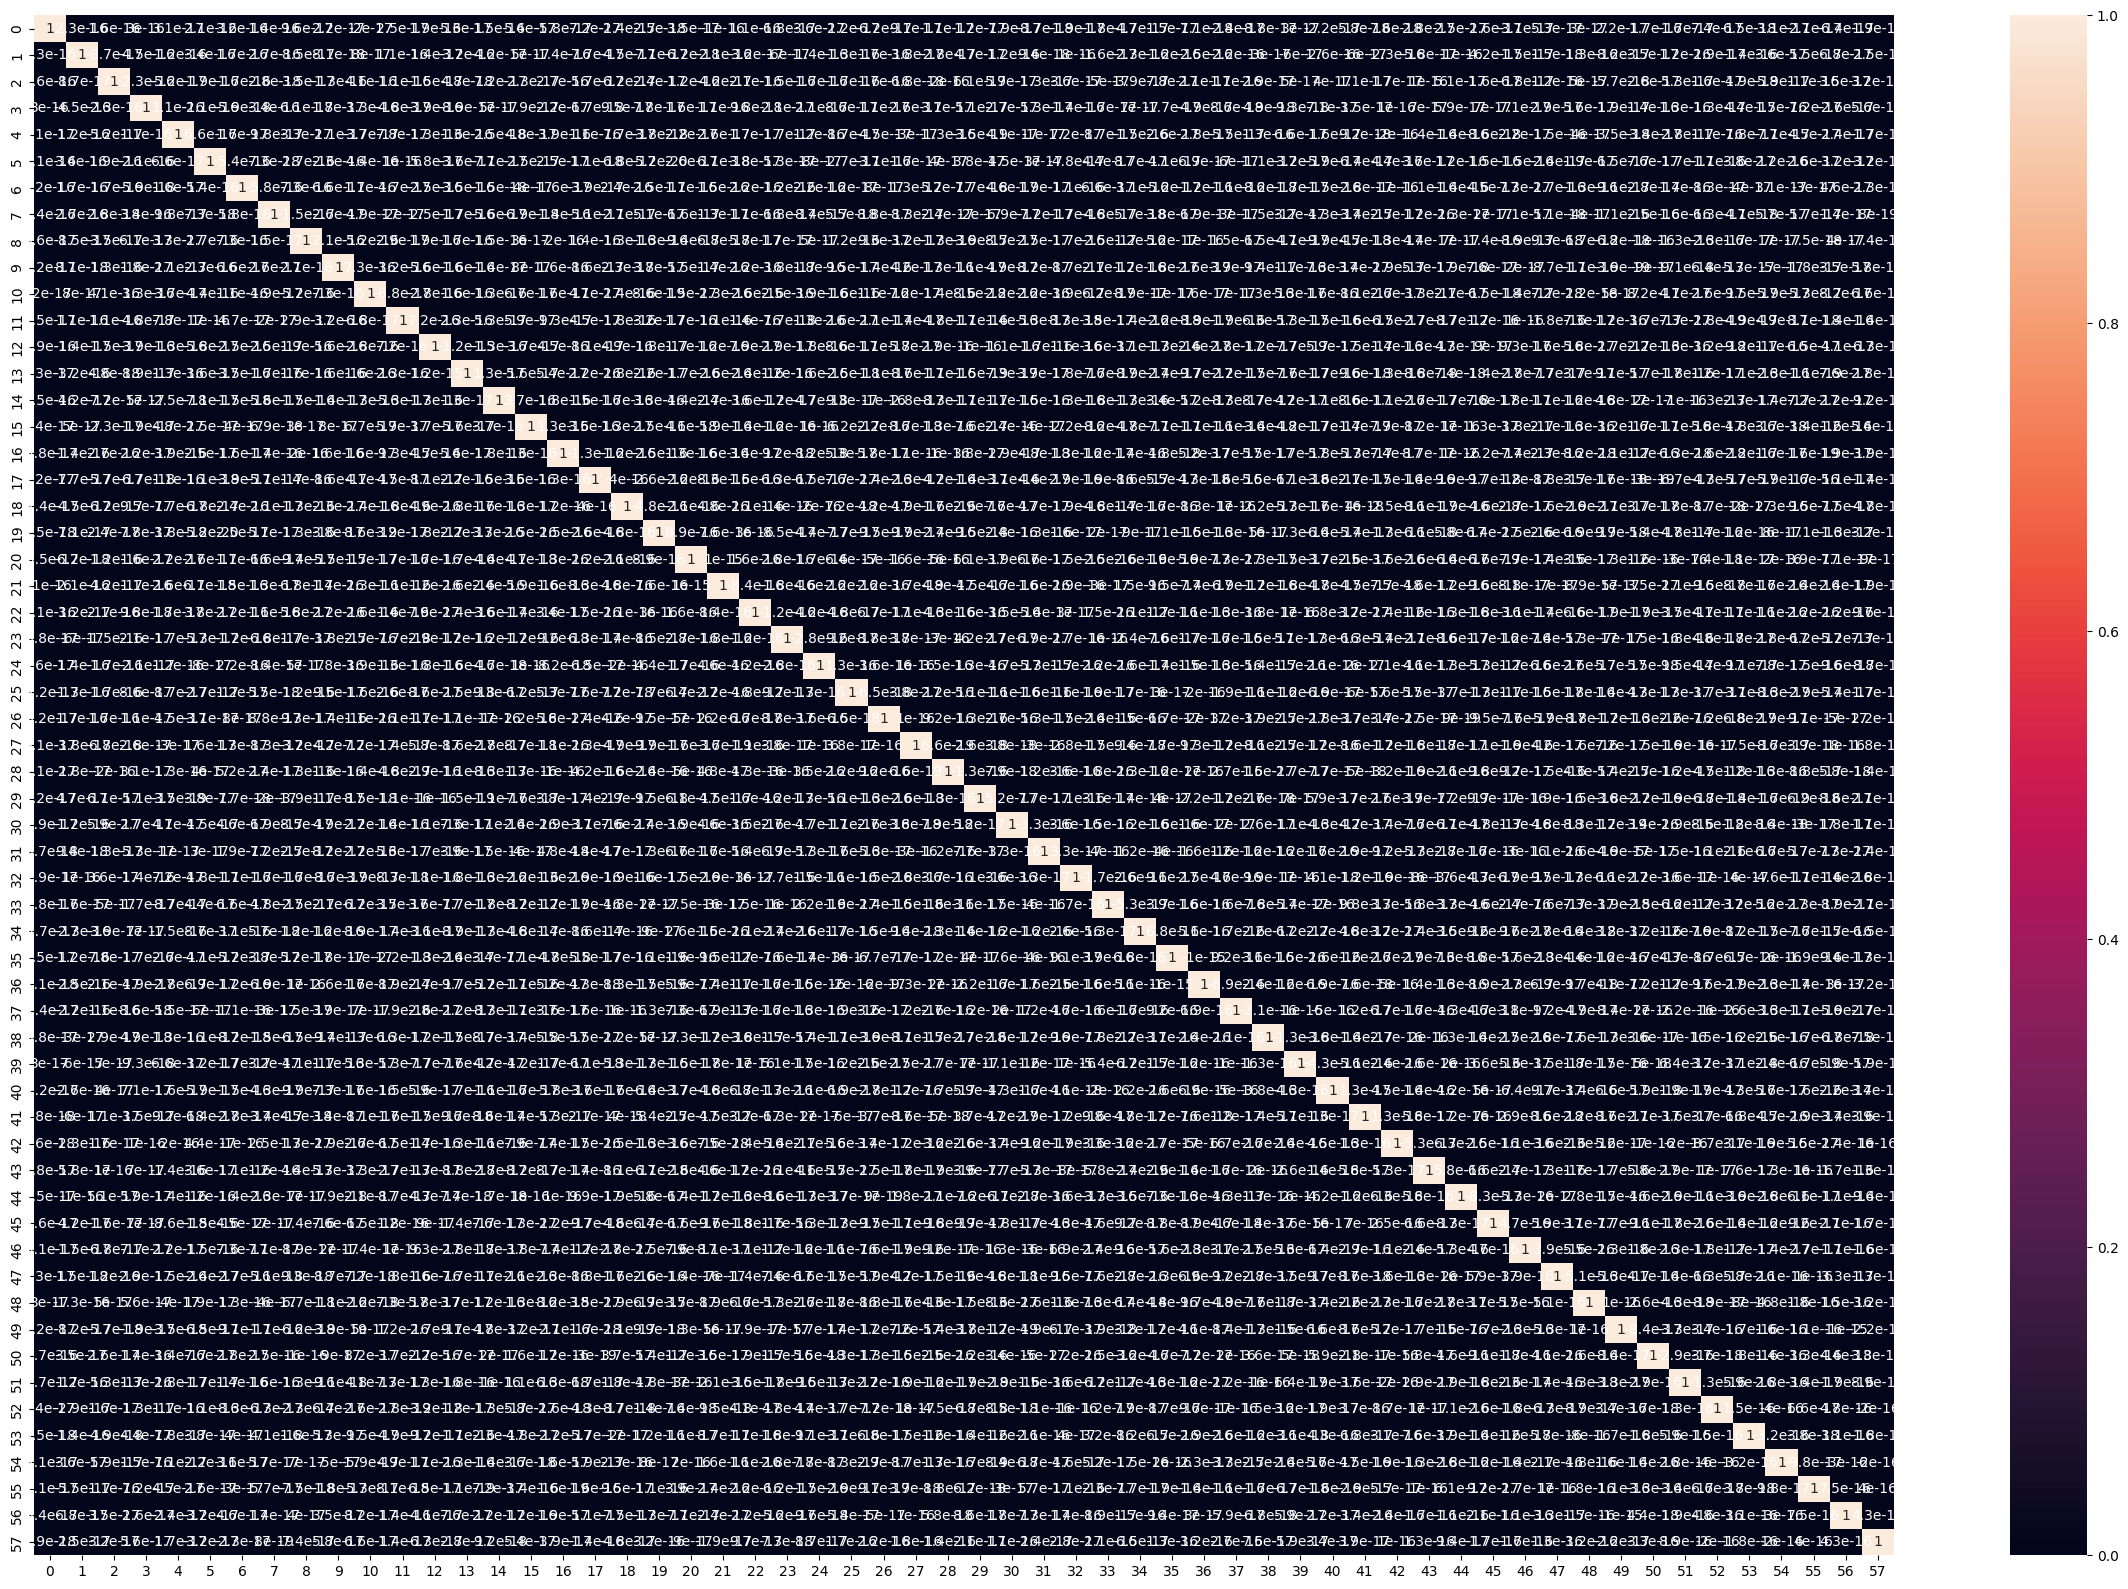

In [107]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (30,20))
sns.heatmap(corrmat,annot = True)

In [108]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.0304809598818793e-15 , min corr:  -1.1887691474040729e-15


In [109]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(4484, 58)

## Applying logistic regression on Principal components

In [110]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca_1 = learner_pca.fit(df_tr_pca,y_tr)

In [111]:
#Making prediction on the test data
pred_probs_test = model_pca_1.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

In [112]:
#Make predictions
y_train_pred_1 = model_pca_1.predict_proba(df_tr_pca)[:,1]
y_test_pred_1 = model_pca_1.predict_proba(df_test_pca)[:,1]

In [113]:
y_train_pred_1 = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':y_train_pred_1})
y_train_pred_1.head()
y_train_pred_1['predicted'] = y_train_pred_1.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_1 = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred_1})
y_test_pred_1.head()
y_test_pred_1['predicted'] = y_test_pred_1.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_test_pred_1.head()

,Churn,Churn_Prob,predicted
24492,0,0.43,0
41068,0,0.67,1
29489,0,0.00,0
6780,0,0.16,0
886,0,0.47,0


In [114]:
confusion_test_1 = metrics.confusion_matrix(y_test_pred_1.Churn, y_test_pred_1.predicted )
print(confusion_test_1)
print("Accuracy of test data:", metrics.accuracy_score(y_test_pred_1.Churn, y_test_pred_1.predicted))
print("Recall of test data:",metrics.recall_score(y_test_pred_1.Churn, y_test_pred_1.predicted))
confusion_train_1 = metrics.confusion_matrix(y_train_pred_1.Churn, y_train_pred_1.predicted )
print(confusion_train_1)
print("Accuracy of train data:", metrics.accuracy_score(y_train_pred_1.Churn, y_train_pred_1.predicted))
print("Recall of train data:", metrics.recall_score(y_train_pred_1.Churn, y_train_pred_1.predicted))

[[3439  802]
 [  52  191]]
Accuracy of test data: 0.8095450490633364
Recall of test data: 0.7860082304526749
[[8033 1848]
 [1439 8442]]
Accuracy of train data: 0.8336706811051513
Recall of train data: 0.8543669669061836


OBSERVATIONS

1. Data is higly imbalanced only 5.6% data is churn & remaining is non_churn
2. SMOTE is applied to balance data
3. ~80% accuracy and 78% recall on test data obtained with Logistic regresision on PCA features explaining 96% variance
4. 96% variance can be explained with 58 features and maintain 80% accuracy

#Hyper parameter tuning using GridSearchCV

In [121]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#step 1: create cross validation scheme

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#specify range of hyperparameters
hyper_params = [{"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}]

#perform grid search
lm = LogisticRegression()

model_cv = GridSearchCV(lm, hyper_params, scoring = "recall", cv = folds, verbose = 0, return_train_score = True)

#fit the model
model_cv.fit(df_tr_pca, y_tr)


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}],
             return_train_score=True, scoring='recall')

In [123]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.06,0.01,0.01,0.00,0.00,{'C': 0.001},0.81,0.81,0.82,0.80,...,0.81,0.01,7,0.81,0.81,0.80,0.81,0.81,0.81,0.00
1,0.07,0.00,0.01,0.00,0.01,{'C': 0.01},0.80,0.81,0.81,0.80,...,0.80,0.00,8,0.81,0.80,0.80,0.80,0.80,0.80,0.00
2,0.15,0.03,0.01,0.00,0.10,{'C': 0.1},0.84,0.84,0.85,0.84,...,0.84,0.01,6,0.85,0.84,0.84,0.84,0.84,0.84,0.00
3,0.30,0.07,0.01,0.00,1,{'C': 1},0.85,0.85,0.87,0.85,...,0.85,0.01,5,0.86,0.86,0.85,0.86,0.85,0.85,0.00
4,0.39,0.04,0.01,0.00,10,{'C': 10},0.85,0.85,0.87,0.85,...,0.86,0.01,4,0.86,0.86,0.86,0.86,0.86,0.86,0.00
5,0.35,0.03,0.01,0.00,100,{'C': 100},0.85,0.86,0.87,0.85,...,0.86,0.01,3,0.86,0.86,0.85,0.86,0.86,0.86,0.00
6,0.48,0.10,0.02,0.00,1000,{'C': 1000},0.85,0.86,0.87,0.85,...,0.86,0.01,1,0.86,0.86,0.85,0.86,0.86,0.86,0.00
7,0.50,0.11,0.01,0.01,10000,{'C': 10000},0.85,0.86,0.87,0.85,...,0.86,0.01,1,0.86,0.86,0.85,0.86,0.86,0.86,0.00


In [124]:
best_value_of_C = model_cv.best_estimator_.get_params()['C']
print('Best value of C:',best_value_of_C)

Best value of C: 1000


Running logistic regression with best value of C

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(C=best_value_of_C)
model_pca_2 = learner_pca.fit(df_tr_pca, y_tr)

In [127]:
#Making prediction on the test data
pred_probs_test_2 = model_pca_2.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_2))

'0.86'

Make predictions

In [133]:
y_train_pred_2 = model_pca_2.predict_proba(df_tr_pca)[:,1]
y_test_pred_2 = model_pca_2.predict_proba(df_test_pca)[:,1]

In [134]:
y_train_pred_2 = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':y_train_pred_2})
y_train_pred_2.head()
y_train_pred_2['predicted'] = y_train_pred_2.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_2 = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred_2})
y_test_pred_2.head()
y_test_pred_2['predicted'] = y_test_pred_2.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_test_pred_2.head()

,Churn,Churn_Prob,predicted
24492,0,0.43,0
41068,0,0.66,1
29489,0,0.00,0
6780,0,0.17,0
886,0,0.48,0


In [136]:
confusion_test_2 = metrics.confusion_matrix(y_test_pred_2.Churn, y_test_pred_2.predicted)
print(confusion_test_2)
print("Accuracy of test data:", metrics.accuracy_score(y_test_pred_2.Churn, y_test_pred_2.predicted))
print("Recall of test data:",metrics.recall_score(y_test_pred_2.Churn, y_test_pred_2.predicted))
confusion_train_2 = metrics.confusion_matrix(y_train_pred_2.Churn, y_train_pred_2.predicted )
print(confusion_train_2)
print("Accuracy of train data:", metrics.accuracy_score(y_train_pred_2.Churn, y_train_pred_2.predicted))
print("Recall of train data:", metrics.recall_score(y_train_pred_2.Churn, y_train_pred_2.predicted))

[[3435  806]
 [  51  192]]
Accuracy of test data: 0.8088760035682426
Recall of test data: 0.7901234567901234
[[8033 1848]
 [1424 8457]]
Accuracy of train data: 0.8344297135917417
Recall of train data: 0.8558850318793645


In [137]:
def draw_roc(actual, probs):
  fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
  auc_score = metrics.roc_auc_score(actual, probs)
  plt.figure(figsize= (6,6))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()
  return None


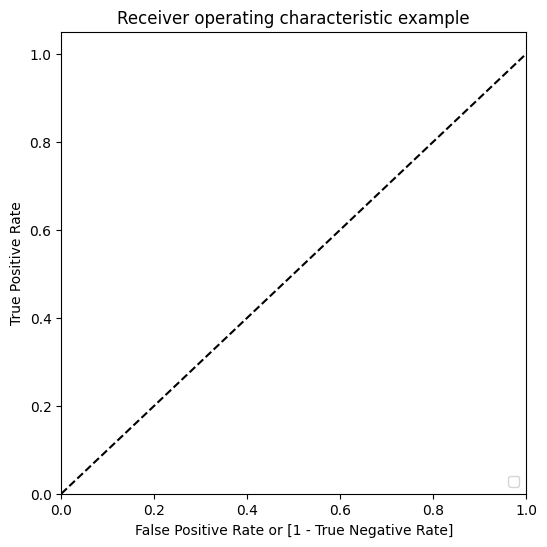

'0.86'

In [138]:
%matplotlib inline
draw_roc(y_test_pred_2.Churn, y_test_pred_2.Churn_Prob)
"{:2.2f}".format(metrics.roc_auc_score(y_test_pred_2.Churn, y_test_pred_2.Churn_Prob))

In [139]:
#Other metrics for test data
TP = confusion_test_2[1,1] # true positive
TN = confusion_test_2[0,0] # true negatives
FP = confusion_test_2[0,1] # false positives
FN = confusion_test_2[1,0] # false negatives
print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("False Positive Rate:", FP/ float(TN+FP))
print("Positive Predictive Value :", TP / float(TP+FP))
print("Negative Predictive Value :", TN / float(TN+FN))

Sensitivity: 0.7901234567901234
Specificity: 0.8099504833765622
False Positive Rate: 0.19004951662343786
Positive Predictive Value : 0.19238476953907815
Negative Predictive Value : 0.9853700516351118


Finding optimal cutoff

In [141]:
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,]
for i in numbers:
  y_train_pred_2[i] = y_train_pred_2.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_2.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.40,0,1,1,1,1,1,0,0,0,0,0
1,0,0.06,0,1,0,0,0,0,0,0,0,0,0
2,0,0.30,0,1,1,1,0,0,0,0,0,0,0
3,0,0.15,0,1,1,0,0,0,0,0,0,0,0
4,0,0.00,0,1,0,0,0,0,0,0,0,0,0


Now lets calculate the accracy specificity and sensitivity

In [149]:
cutoff_df = pd.DataFrame(columns = ["prob", "accuracy","sensitivity","specificity"])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,]
for i in num:
  cm1 = metrics.confusion_matrix(y_train_pred_2.Churn, y_train_pred_2[i])
  total1 = sum(sum(cm1))
  accuracy = (cm1[0,0]+cm1[1,1])/total1
  specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  sensitivity = cm1[1,1]+(cm1[1,0]+cm1[1,1])
  cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
cutoff_df



,prob,accuracy,sensitivity,specificity
0.00,0.00,0.50,"19,762.00",0.00
0.10,0.10,0.70,"19,547.00",0.42
0.20,0.20,0.76,"19,339.00",0.57
0.30,0.30,0.80,"19,097.00",0.67
0.40,0.40,0.83,"18,791.00",0.75
0.50,0.50,0.83,"18,338.00",0.81
0.60,0.60,0.83,"17,709.00",0.87
0.70,0.70,0.81,"16,893.00",0.91
0.80,0.80,0.76,"15,585.00",0.94
0.90,0.90,0.64,"12,812.00",0.98


<Figure size 500x1000 with 0 Axes>

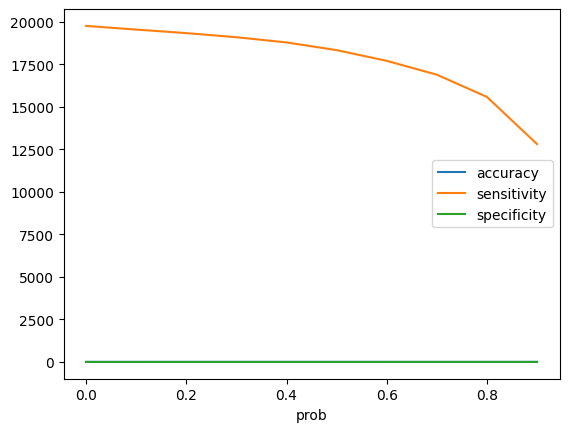

In [150]:
plt.figure(figsize=(5,10))
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

Ideal cut-off point is ~.5. We made our previous anaysis with this so it is the final result.

## 4.6.6 Logistic Regression with class weight to handle imbalance instead of SMOTE

In [151]:
pca.fit(X_train)


PCA(random_state=100, svd_solver='randomized')

In [152]:
pca.components_

array([[ 2.97418719e-02,  2.21644978e-02,  2.11143522e-02, ...,
        -4.22478603e-02, -4.29892253e-02, -3.99690909e-02],
       [ 1.20901965e-01,  9.65161102e-02,  1.63470631e-01, ...,
        -2.10696459e-02, -1.58822929e-02,  2.89703373e-03],
       [ 2.16301849e-02,  6.14233123e-02,  1.03777551e-01, ...,
        -1.44138516e-02,  2.77395821e-02,  4.57759128e-02],
       ...,
       [ 4.80494228e-09,  1.53366452e-07, -1.05427559e-07, ...,
         9.38262523e-08,  9.94116283e-08, -2.24073850e-07],
       [ 0.00000000e+00,  1.54148752e-17,  4.66278889e-17, ...,
         8.13416142e-19, -4.09622267e-17,  5.94531618e-17],
       [ 0.00000000e+00,  5.27395088e-17, -1.37291135e-16, ...,
         1.53716304e-17, -7.86515145e-17, -1.51798199e-17]])

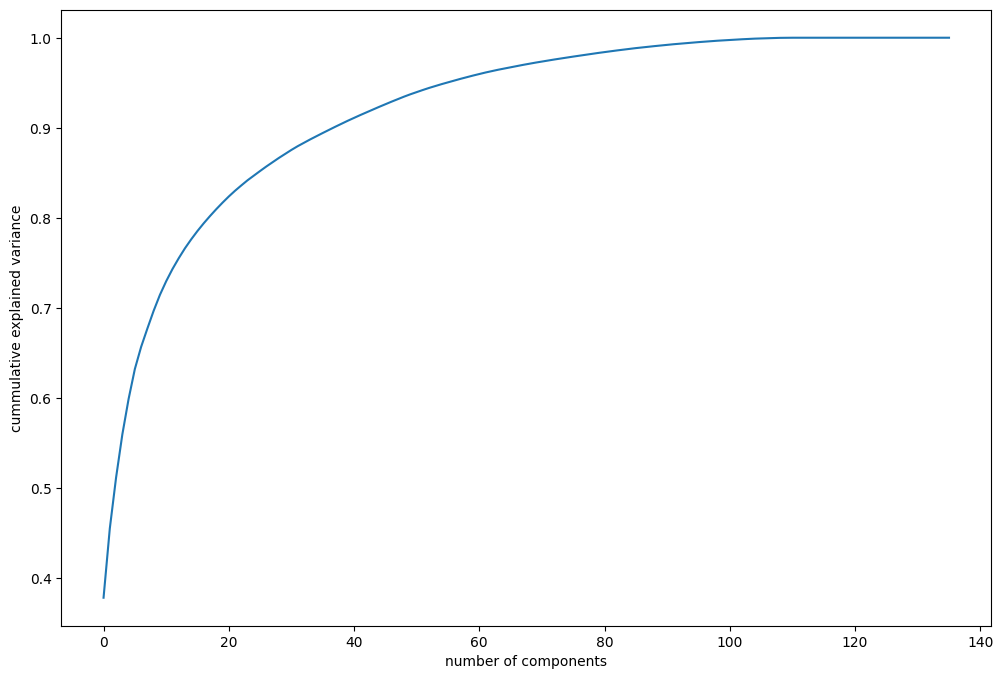

In [159]:
fig = plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cummulative explained variance")
plt.show()

In [162]:
pca_ci = PCA(.97)

In [163]:
df_train_pca_ci = pca_ci.fit_transform(X_train)
print(df_train_pca_ci.shape)
df_test_pca_ci = pca_ci.transform(X_test)
print(df_test_pca_ci.shape)

(10461, 69)
(4484, 69)


69 features explain 97% variance

Hyperparameter tuning

In [165]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#create a croos validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#Specify range of hyperparameters to tune
hyper_params = [{"C": [1, 10, 100, 1000, 100000, 1000000000]}, {"class_weight": [{ 0:w, 1:1-w} for w in [.02,.03,.04,.05,.10]]}]

lm = LogisticRegression()

model_cv = GridSearchCV(lm, hyper_params, scoring=["recall","accuracy"], cv = folds, refit = "recall", verbose=0, return_train_score=True)
model_cv.fit(df_train_pca_ci, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 10, 100, 1000, 100000, 1000000000]},
                         {'class_weight': [{0: 0.02, 1: 0.98},
                                           {0: 0.03, 1: 0.97},
                                           {0: 0.04, 1: 0.96},
                                           {0: 0.05, 1: 0.95},
                                           {0: 0.1, 1: 0.9}]}],
             refit='recall', return_train_score=True,
             scoring=['recall', 'accuracy'])

In [166]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_C', 'param_class_weight', 'mean_test_recall','mean_train_recall','mean_test_accuracy', 'mean_train_accuracy']]

,param_C,param_class_weight,mean_test_recall,mean_train_recall,mean_test_accuracy,mean_train_accuracy
0,1,NaN,0.07,0.08,0.94,0.95
1,10,NaN,0.11,0.12,0.94,0.95
2,100,NaN,0.12,0.13,0.94,0.95
3,1000,NaN,0.12,0.13,0.94,0.95
4,100000,NaN,0.12,0.13,0.94,0.95
5,1000000000,NaN,0.12,0.13,0.94,0.95
6,NaN,"{0: 0.02, 1: 0.98}",0.93,0.95,0.49,0.48
7,NaN,"{0: 0.03, 1: 0.97}",0.88,0.91,0.63,0.63
8,NaN,"{0: 0.04, 1: 0.96}",0.84,0.87,0.71,0.72
9,NaN,"{0: 0.05, 1: 0.95}",0.80,0.83,0.77,0.77


In [168]:
best_values = model_cv.best_estimator_.get_params()
print('Best value of C:',best_values['C'])
print('Best value of class_weight:',best_values['class_weight'])

Best value of C: 1.0
Best value of class_weight: {0: 0.02, 1: 0.98}


Even though best values for recall are C=1 and class_Weight={0:.02,1:.98}, with recall of 90+%, accuracy drops significantly to 47%. SO choosing class_weight {0: 0.04, 1: 0.96} instead.

Train model

In [169]:
#training data on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca_ci = LogisticRegression(C=1, class_weight = {0: 0.04, 1: 0.96})
model_pca_ci  = learner_pca_ci.fit(df_train_pca_ci, y_train)

In [170]:
#Make predictions on test set
pred_probs_test_ci = model_pca_ci.predict_proba(df_test_pca_ci)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_ci))

'0.86'

In [171]:
y_train_pred_ci = model_pca_ci.predict_proba(df_train_pca_ci)[:,1]
y_test_pred_ci = model_pca_ci.predict_proba(df_test_pca_ci)[:,1]

In [172]:
y_train_pred_final_ci = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred_ci})
y_train_pred_final_ci.head()
y_train_pred_final_ci['predicted'] = y_train_pred_final_ci.Churn_Prob.map(lambda x: 1 if x > 0.50 else 0)
y_test_pred_final_ci = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred_ci})
y_test_pred_final_ci.head()
y_test_pred_final_ci['predicted'] = y_test_pred_final_ci.Churn_Prob.map(lambda x: 1 if x > 0.50 else 0)
# Let's see the head
y_test_pred_final_ci.head()

,Churn,Churn_Prob,predicted
24492,0,0.55,1
41068,0,0.71,1
29489,0,0.05,0
6780,0,0.24,0
886,0,0.44,0


In [173]:
confusion_test_ci = metrics.confusion_matrix(y_test_pred_final_ci.Churn, y_test_pred_final_ci.predicted )
print(confusion_test_ci)
print("Accuracy of test data:", metrics.accuracy_score(y_test_pred_final_ci.Churn, y_test_pred_final_ci.predicted))
print("Recall of test data:",metrics.recall_score(y_test_pred_final_ci.Churn, y_test_pred_final_ci.predicted))
confusion_train_ci = metrics.confusion_matrix(y_train_pred_final_ci.Churn, y_train_pred_final_ci.predicted )
print(confusion_train_ci)
print("Accuracy of train data:", metrics.accuracy_score(y_train_pred_final_ci.Churn, y_train_pred_final_ci.predicted))
print("Recall of train data:", metrics.recall_score(y_train_pred_final_ci.Churn, y_train_pred_final_ci.predicted))

[[3009 1232]
 [  38  205]]
Accuracy of test data: 0.7167707404103479
Recall of test data: 0.8436213991769548
[[7020 2861]
 [  80  500]]
Accuracy of train data: 0.7188605295860816
Recall of train data: 0.8620689655172413


In [174]:
#Other metrics for test data
TP = confusion_test_ci[1,1] # true positive
TN = confusion_test_ci[0,0] # true negatives
FP = confusion_test_ci[0,1] # false positives
FN = confusion_test_ci[1,0] # false negatives
print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("False Positive Rate:", FP/ float(TN+FP))
print("Positive Predictive Value :", TP / float(TP+FP))
print("Negative Predictive Value :", TN / float(TN+FN))

Sensitivity: 0.8436213991769548
Specificity: 0.7095024758311719
False Positive Rate: 0.2904975241688281
Positive Predictive Value : 0.14265831593597772
Negative Predictive Value : 0.9875287167705941


Find optimal cut off

In [176]:
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
  y_train_pred_final_ci[i] = y_train_pred_final_ci.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_ci.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6331,0,0.36,0,1,1,1,1,0,0,0,0,0,0
32093,0,0.19,0,1,1,0,0,0,0,0,0,0,0
45143,0,0.45,0,1,1,1,1,1,0,0,0,0,0
42887,0,0.36,0,1,1,1,1,0,0,0,0,0,0
35110,0,0.04,0,1,0,0,0,0,0,0,0,0,0


In [182]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_ci.Churn, y_train_pred_final_ci[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.00,0.00,0.06,1.00,0.00
0.10,0.10,0.16,0.99,0.11
0.20,0.20,0.31,0.97,0.27
0.30,0.30,0.46,0.95,0.44
0.40,0.40,0.60,0.92,0.58
0.50,0.50,0.72,0.86,0.71
0.60,0.60,0.81,0.79,0.81
0.70,0.70,0.88,0.68,0.89
0.80,0.80,0.92,0.50,0.95
0.90,0.90,0.95,0.18,0.99


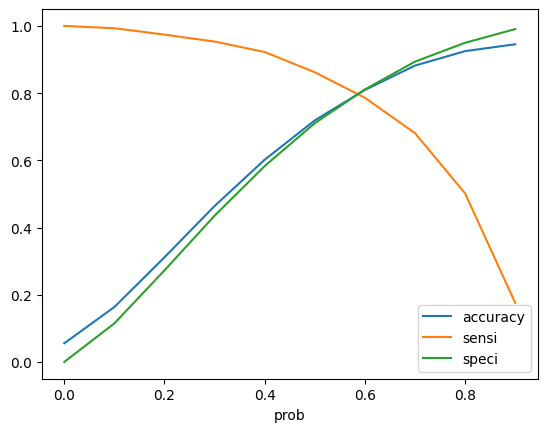

In [183]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Even though ideal cut-off is close to 0.6 but since we prefer higher recall, we will go ahead with model with 0.5 cutoff

We got a model with ~84% recall and 71% accuracy with logistic regression using class_weight. Our previous model with SMOTE was with accuracy 80% bur lower recall of 79%.

#SVM

SVM on tain data

In [184]:
#from sklearn.svm import SVC
#model = SVC(C=1)

#model.fit(df_tr_pca, y_tr)

SVC(C=1)

In [185]:
#y_train_pred_svm = model.predict(df_tr_pca)
#y_test_pred_svm = model.predict(df_test_pca)


In [187]:
'''confusion_test_svm = metrics.confusion_matrix(y_test, y_test_pred_svm )
print(confusion_test_svm)
print("Accuracy of test data:", metrics.accuracy_score(y_test, y_test_pred_svm))
print("Recall of test data:",metrics.recall_score(y_test, y_test_pred_svm))
confusion_train_svm = metrics.confusion_matrix(y_tr, y_train_pred_svm)
print(confusion_train_svm)
print("Accuracy of train data:", metrics.accuracy_score(y_tr, y_train_pred_svm))
print("Recall of train data:", metrics.recall_score(y_tr, y_train_pred_svm))'''

'confusion_test_svm = metrics.confusion_matrix(y_test, y_test_pred_svm )\nprint(confusion_test_svm)\nprint("Accuracy of test data:", metrics.accuracy_score(y_test, y_test_pred_svm))\nprint("Recall of test data:",metrics.recall_score(y_test, y_test_pred_svm))\nconfusion_train_svm = metrics.confusion_matrix(y_tr, y_train_pred_svm)\nprint(confusion_train_svm)\nprint("Accuracy of train data:", metrics.accuracy_score(y_tr, y_train_pred_svm))\nprint("Recall of train data:", metrics.recall_score(y_tr, y_train_pred_svm))'

#Decision Tree

Using Lasso as feature reduction technique

In [195]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

svc = LinearSVC(C=0.01, penalty = "l1", dual = False)
lasso = svc.fit(X_tr, y_tr)
model = SelectFromModel(lasso, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices = True)

print(X_lasso.shape)
print(pos)

(19762, 29)
[ 13  14  29  40  47  48  52  53  78  80  83  91  92  93  95 101 104 107
 115 116 119 124 126 127 128 129 130 133 135]


In [196]:
l_features = list(filtered_data.columns[pos])
print(l_features)

['roam_og_mou_6', 'roam_og_mou_7', 'loc_og_mou_7', 'std_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'std_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_7', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_7', 'last_day_rch_amt_7', 'max_rech_data_7', 'vol_2g_mb_7', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_7', 'sachet_3g_6', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'jun_vbc_3g', 'total_rech_data_amt_7']


Lasso gave 29 features we will use this to build our decission trees

In [197]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5)

Perform prediction and evaluate model

In [198]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test_lasso = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred_default = dt_default.predict(X_test_lasso)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      4241
           1       0.22      0.66      0.33       243

    accuracy                           0.85      4484
   macro avg       0.60      0.76      0.62      4484
weighted avg       0.94      0.85      0.88      4484



In [199]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print("Accuracy:", accuracy_score(y_test,y_pred_default))
from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test,y_pred_default))

[[3659  582]
 [  82  161]]
Accuracy: 0.8519179304192686
Recall: 0.6625514403292181


Sensitivity is low we will tune the decision tree

#Hyperparameter tuning

In [200]:
#create the parameter grid
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    "max_depth": range(5,15, 5),
    "min_samples_leaf": range(1, 150, 30),
    "min_samples_split": range(2, 150 ,30),
    "criterion" : ["entropy","gini"]
}

n_folds = 5

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = n_folds, verbose = 1, scoring=["recall", "accuracy"], refit = "recall")

grid_search.fit(X_lasso, y_tr)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(1, 150, 30),
                         'min_samples_split': range(2, 150, 30)},
             refit='recall', scoring=['recall', 'accuracy'], verbose=1)

In [201]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)

In [202]:
cv_results[['param_criterion','param_max_depth', 'param_min_samples_leaf','param_min_samples_split','mean_test_recall','mean_test_accuracy']]

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_recall,mean_test_accuracy
0,entropy,5,1,2,0.90,0.86
1,entropy,5,1,32,0.90,0.86
2,entropy,5,1,62,0.90,0.86
3,entropy,5,1,92,0.90,0.86
4,entropy,5,1,122,0.90,0.86
...,...,...,...,...,...,...
95,gini,10,121,2,0.87,0.87
96,gini,10,121,32,0.87,0.87
97,gini,10,121,62,0.87,0.87
98,gini,10,121,92,0.87,0.87


In [203]:
# printing the optimal accuracy score and hyperparameters
print("best score: ", grid_search.best_score_)
print("best estimators: ", grid_search.best_estimator_)

best score:  0.9404891577022397
best estimators:  DecisionTreeClassifier(criterion='entropy', max_depth=10)


Running the model with best parameters obtained from Grid search

In [204]:
# model with optimal hyperparameters
#By checking the hyperparameters manualy, rerun the Decision tree
clg_gini = DecisionTreeClassifier(criterion = "gini", max_depth=10, min_samples_leaf=61, min_samples_split=122)
clg_gini.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=61, min_samples_split=122)

In [205]:
clg_gini.score(X_lasso, y_tr)

0.8956583341767027

In [206]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clg_gini.predict(X_test_lasso)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      4241
           1       0.23      0.62      0.34       243

    accuracy                           0.87      4484
   macro avg       0.60      0.75      0.63      4484
weighted avg       0.94      0.87      0.90      4484



In [211]:
# confusion matrix, accuracy and recall
print(confusion_matrix(y_test,y_pred_default))
# Printing confusion matrix and accuracy
print("Accuracy:", accuracy_score(y_test,y_pred))
from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test,y_pred))

[[3659  582]
 [  82  161]]
Accuracy: 0.8695361284567351
Recall: 0.6172839506172839


#Randon Forest

In [212]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_tr,y_tr)


RandomForestClassifier()

In [213]:
predictions = rfc.predict(X_test)

In [215]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print("Recall", metrics.recall_score(y_test, predictions))

[[4089  152]
 [ 127  116]]
Accuracy 0.937778768956289
Recall 0.4773662551440329


#Perform hyperparameter tuning

Tuning max_depth (maximum depth of the tree

In [217]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {"max_depth": range(2,20,3)}

rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, cv = n_folds, scoring=["recall","accuracy"], refit="recall",return_train_score=True)

rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 3)}, refit='recall',
             return_train_score=True, scoring=['recall', 'accuracy'])

In [218]:
scores = pd.DataFrame(rf.cv_results_)
scores[["param_max_depth","mean_train_recall","mean_test_recall","mean_train_accuracy","mean_test_accuracy"]]

,param_max_depth,mean_train_recall,mean_test_recall,mean_train_accuracy,mean_test_accuracy
0,2,0.81,0.81,0.85,0.85
1,5,0.89,0.88,0.90,0.89
2,8,0.97,0.95,0.96,0.94
3,11,1.00,0.98,0.98,0.96
4,14,1.00,0.98,0.99,0.97
5,17,1.00,0.98,0.99,0.97


In [219]:
# # plotting accuracies/recall with max_depth
def plotDTAccuracyRecall(scores, hyperParameter):
    fig = plt.figure(figsize = (16,8))
    plt.subplot(1, 2, 1)
    plt.plot(scores['param_' + hyperParameter],
              scores["mean_train_recall"],
              label="training recall")
    plt.plot(scores['param_' + hyperParameter],
              scores["mean_test_recall"],
              label="test recall")
    plt.xlabel(hyperParameter)
    plt.ylabel("Recall")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(scores['param_' + hyperParameter],
              scores["mean_train_accuracy"],
              label="training accuracy")
    plt.plot(scores['param_' + hyperParameter],
              scores["mean_test_accuracy"],
              label="test accuracy")
    plt.xlabel(hyperParameter)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

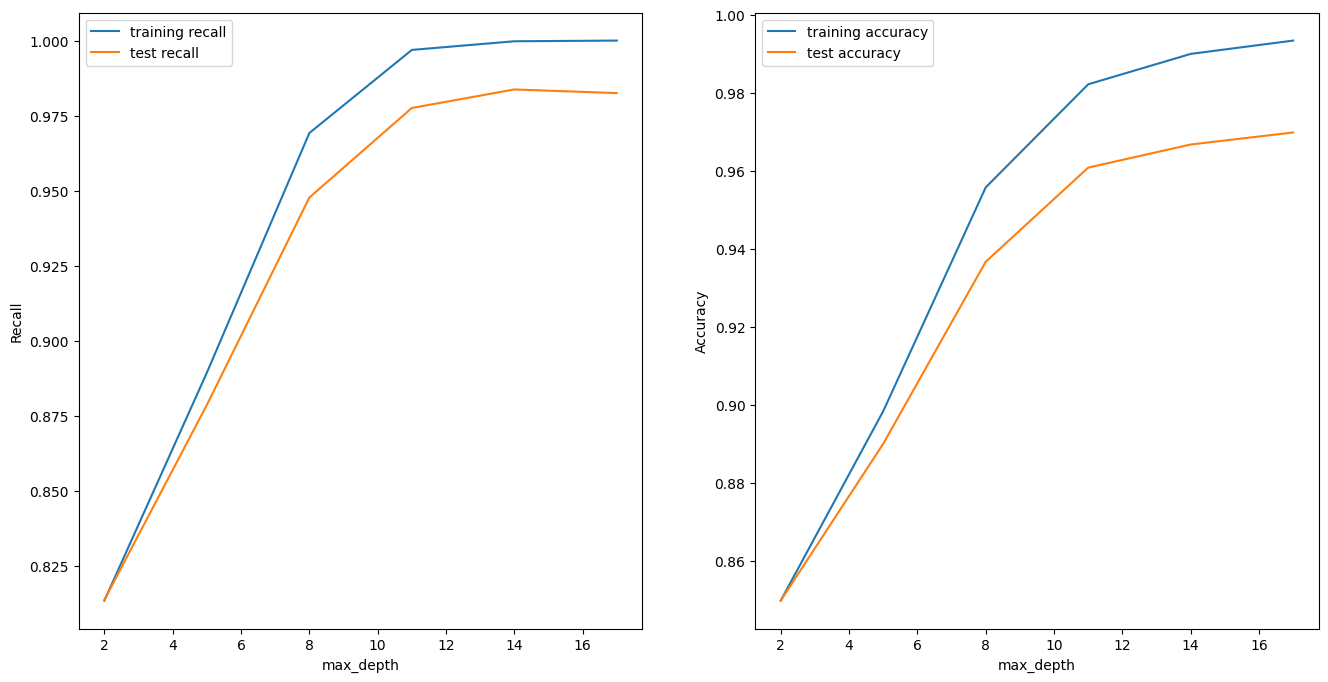

In [220]:
plotDTAccuracyRecall(scores,"max_depth")

You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

Tuning max features

In [221]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {"max_features": [4,8,14,20,24]}

rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, cv = n_folds, scoring=["recall","accuracy"], refit="recall",return_train_score=True)

rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 8, 14, 20, 24]}, refit='recall',
             return_train_score=True, scoring=['recall', 'accuracy'])

In [222]:
scores = pd.DataFrame(rf.cv_results_)
scores[['param_max_features', 'mean_train_recall', 'mean_test_recall','mean_train_accuracy','mean_test_accuracy']]

,param_max_features,mean_train_recall,mean_test_recall,mean_train_accuracy,mean_test_accuracy
0,4,1.00,0.98,1.00,0.97
1,8,1.00,0.98,1.00,0.97
2,14,1.00,0.98,1.00,0.97
3,20,1.00,0.98,1.00,0.97
4,24,1.00,0.98,1.00,0.97


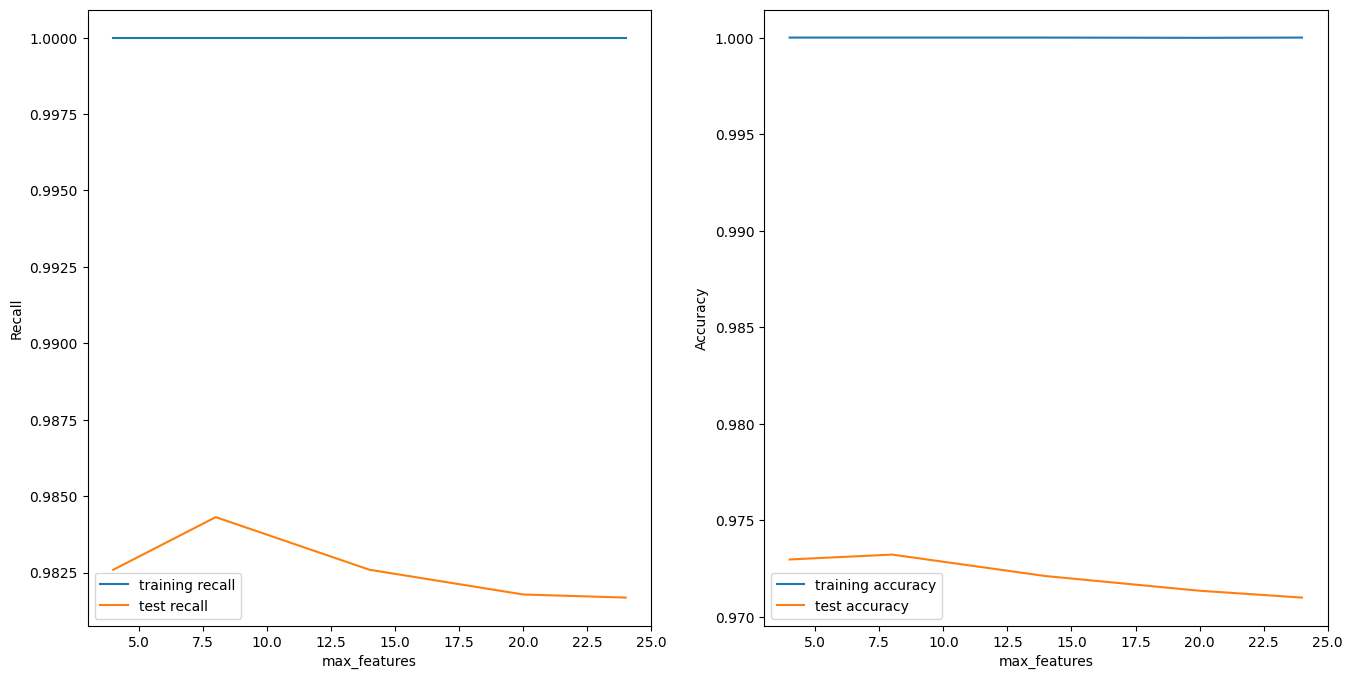

In [223]:
plotDTAccuracyRecall(scores,"max_features")

Tuning min_samples leaf

In [225]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {"min_samples_leaf": range(100,400,50)}

rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, cv = n_folds, scoring=["recall","accuracy"], refit="recall",return_train_score=True)

rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             refit='recall', return_train_score=True,
             scoring=['recall', 'accuracy'])

In [227]:
scores = pd.DataFrame(rf.cv_results_)
scores[['param_min_samples_leaf', 'mean_train_recall', 'mean_test_recall','mean_train_accuracy','mean_test_accuracy']]

,param_min_samples_leaf,mean_train_recall,mean_test_recall,mean_train_accuracy,mean_test_accuracy
0,100,0.89,0.88,0.90,0.90
1,150,0.88,0.87,0.89,0.89
2,200,0.87,0.86,0.89,0.88
3,250,0.86,0.86,0.88,0.88
4,300,0.86,0.85,0.88,0.87
5,350,0.85,0.85,0.87,0.87


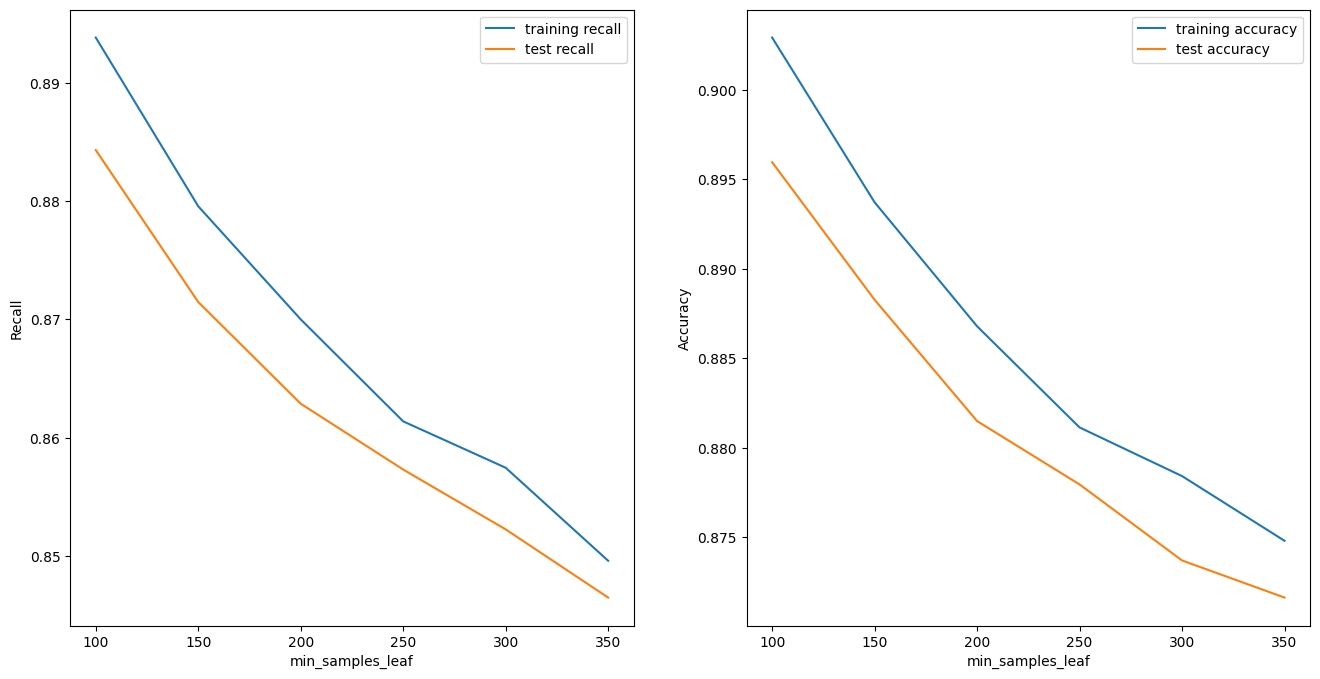

In [228]:
plotDTAccuracyRecall(scores,"min_samples_leaf")

Tuning min_samples split

In [230]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {"min_samples_split": range(200,500,50)}

rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, cv = n_folds, scoring=["recall","accuracy"], refit="recall",return_train_score=True)

rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             refit='recall', return_train_score=True,
             scoring=['recall', 'accuracy'])

In [232]:
scores = pd.DataFrame(rf.cv_results_)
scores[['param_min_samples_split', 'mean_train_recall', 'mean_test_recall','mean_train_accuracy','mean_test_accuracy']]

,param_min_samples_split,mean_train_recall,mean_test_recall,mean_train_accuracy,mean_test_accuracy
0,200,0.92,0.90,0.93,0.91
1,250,0.90,0.89,0.92,0.91
2,300,0.90,0.88,0.92,0.90
3,350,0.89,0.88,0.91,0.90
4,400,0.88,0.87,0.90,0.89
5,450,0.88,0.87,0.90,0.89


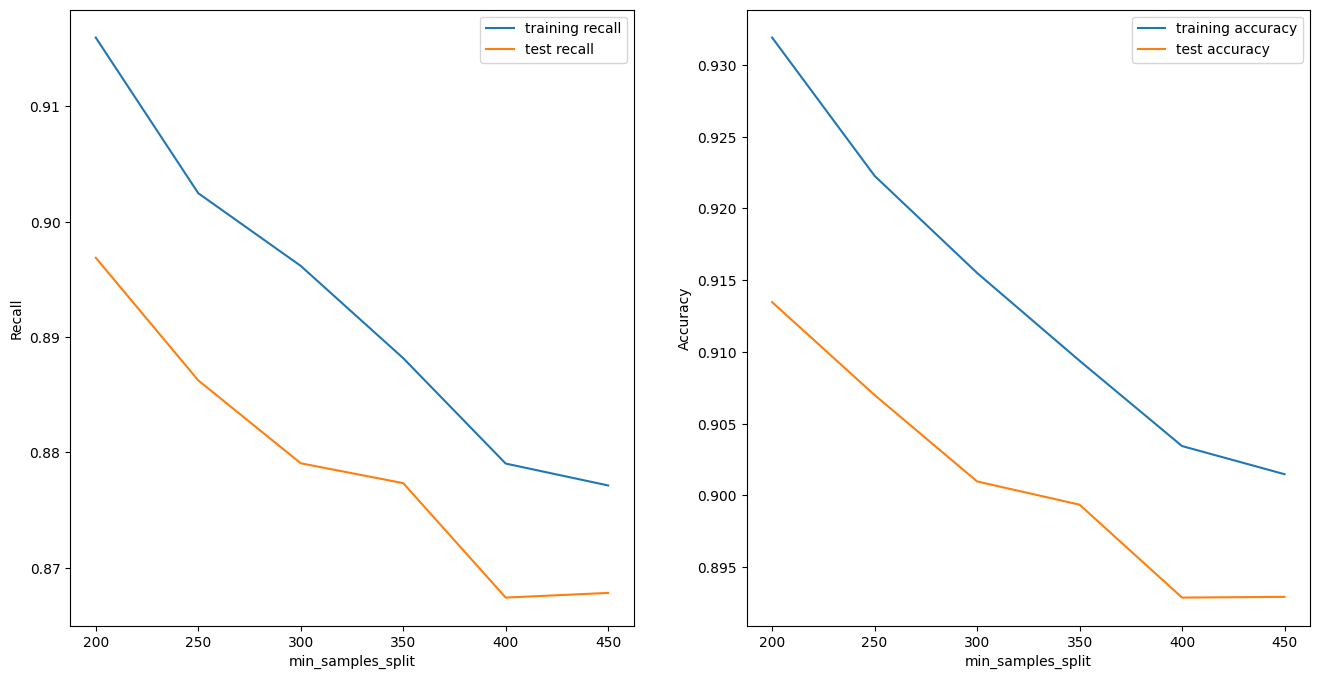

In [233]:
plotDTAccuracyRecall(scores,"min_samples_split")

We can infer that as we reduce the min samples split, both the accuract and recall are reduced

Grid serach to find optimal hyperparameteres

In [240]:
'''param_grid = {
    "max_depth" : [4,8,10],
    "min_samples_leaf": range(100, 400, 200),
    "min_samples_split": range(200, 500, 100),
    "n_estimators": [100,200],
    "max_features": [5,10,15]
}

rf_1 = RandomForestClassifier()

grid_search_1 = GridSearchCV(estimator = rf_1, param_grid = param_grid,  cv=3, n_jobs= -1, verbose= 1,
                             scoring=["recall","accuracy"], refit="recall", return_train_score=True)
grid_search_1.fit(X_tr,y_tr)'''


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10, 15],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 200]},
             refit='recall', return_train_score=True,
             scoring=['recall', 'accuracy'], verbose=1)

In [242]:
rf_best_params = {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}
print('We can get recall of',grid_search_1.best_score_,'using',grid_search_1.best_params_)
rf_best_params = grid_search_1.best_params_

We can get recall of 0.8830091219727126 using {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


Since hyperparameter tuning is takinglot of time to run, we are commenting it out.

Output of hyperparameter tuning: We can get recall of ~0.8925012478509234 using {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}

In [243]:
#Taking all the best estimators except max_depth=10 because it might overfit the decision trees
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=rf_best_params['min_samples_leaf'],
                             min_samples_split=rf_best_params['min_samples_split'],
                             max_features=rf_best_params['max_features'],
                             n_estimators=rf_best_params['n_estimators'])

rfc_final.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=5, max_features=15, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200)

In [244]:
predictions = rfc_final.predict(X_test)
predictions_train = rfc_final.predict(X_tr)

In [246]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy of test data:", accuracy_score(y_test,predictions))
print("Recall of test data:", recall_score(y_test,predictions))


print(classification_report(y_tr,predictions_train))
print(confusion_matrix(y_tr,predictions_train))
print("Accuracy of train data:", accuracy_score(y_tr,predictions_train))
print("Recall of train data:", recall_score(y_tr,predictions_train))


              precision    recall  f1-score   support

           0       0.98      0.90      0.94      4241
           1       0.29      0.72      0.41       243

    accuracy                           0.89      4484
   macro avg       0.63      0.81      0.67      4484
weighted avg       0.94      0.89      0.91      4484

[[3801  440]
 [  67  176]]
Accuracy of test data: 0.8869313113291704
Recall of test data: 0.7242798353909465
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      9881
           1       0.90      0.88      0.89      9881

    accuracy                           0.89     19762
   macro avg       0.89      0.89      0.89     19762
weighted avg       0.89      0.89      0.89     19762

[[8883  998]
 [1163 8718]]
Accuracy of train data: 0.890648719765206
Recall of train data: 0.8822993624127112


We are getting good results from random forest with accuracy of 88% and recall of approximately 73%

Get important features

In [247]:
#list first 15 important features in descending order
indices = np.argsort(rfc.feature_importances_)[::-1]

for f in range(0,15):
    print("%2d) %-*s %f" % (f + 1, 30, X_train.columns[indices[f]], rfc.feature_importances_[indices[f]]))

 1) roam_ic_mou_8                  0.091371
 2) roam_og_mou_8                  0.073206
 3) total_ic_mou_8                 0.043696
 4) last_day_rch_amt_8             0.031696
 5) arpu_8                         0.031067
 6) loc_ic_t2m_mou_8               0.027818
 7) total_rech_amt_8               0.025875
 8) max_rech_amt_8                 0.025832
 9) loc_og_mou_8                   0.025373
10) loc_ic_mou_8                   0.022263
11) total_rech_num_8               0.019189
12) max_rech_data_8                0.018225
13) total_rech_data_amt_8          0.017276
14) roam_og_mou_7                  0.015828
15) loc_og_t2m_mou_8               0.013797


<Axes: >

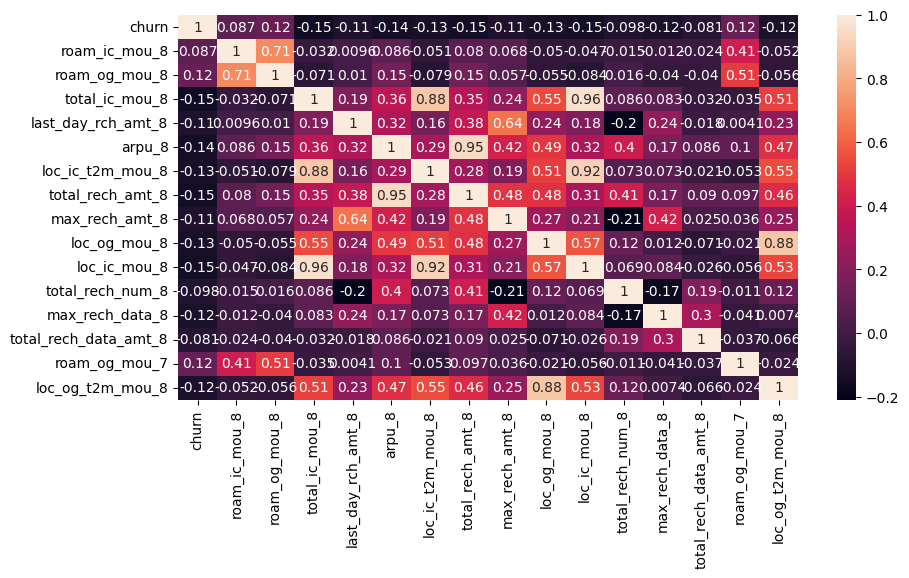

In [249]:
plt.subplots(figsize=(10,5))
columns =  [X_train.columns[indices[f]] for f in range(0,15)]
columns.insert(0, 'churn')

data=filtered_data[columns]
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)

As seen in above heatmap:
- Few features have positive correlation with Churn which means that with increase in thesefeatures, churn rate increases. Example-roam_og_mou_8, roam_ic_mou_8, drop_in_arpu_8,drop_in_mou_8
- Few features have negative correlation with churn rate. Example-total_ic_mou_8, last_day_rch_amt_8, loc_ic_mou_8, total_rech_amt_8, etc.
- These features do not have very high correlation so combination of these impact churn.

Let's plot some of these features and see how they impact churn.

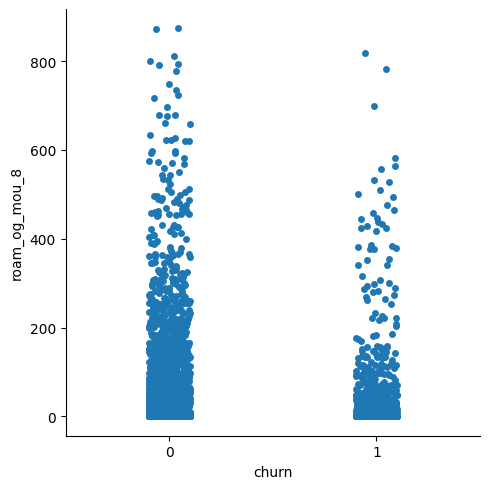

In [250]:
sns.catplot(x="churn",y="roam_og_mou_8",data= filtered_data)

If roaming out minutes of usage is less than ~400 then there are high chances of churning

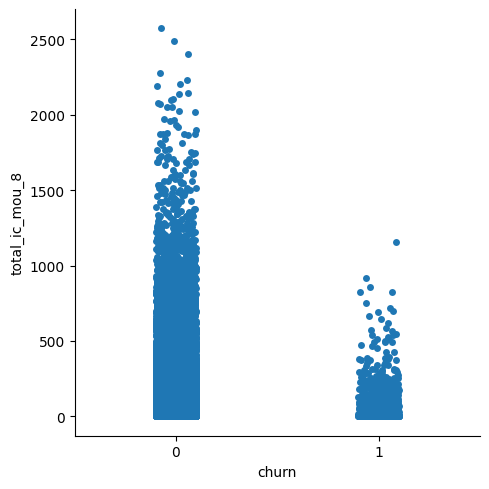

In [251]:
sns.catplot(x="churn",y="total_ic_mou_8",data= filtered_data)

As seen from the graph that if the total incoming minutes of usage is less than 500 then there are high chances of customer to churn

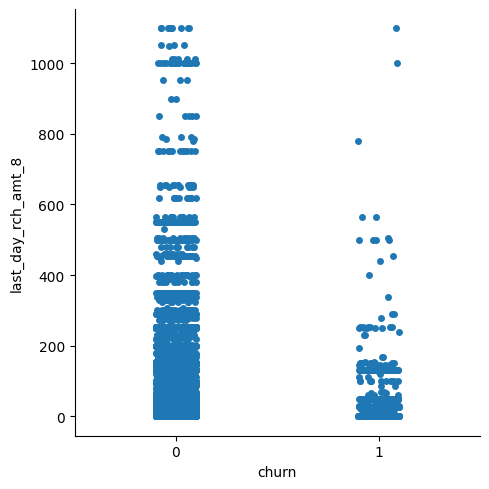

In [252]:
sns.catplot(x="churn", y="last_day_rch_amt_8", data=filtered_data)

As seen from the plot that last day recharge amount for the 8th month is less than 225

<Axes: xlabel='churn', ylabel='loc_ic_mou_8'>

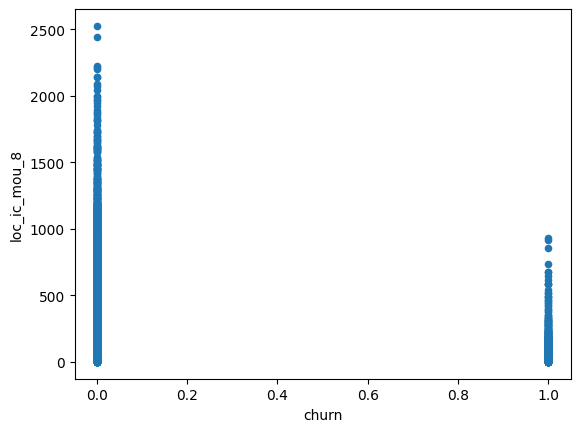

In [254]:
filtered_data.plot.scatter(y='loc_ic_mou_8',x='churn')

As seen from the diagram the local incoming minutes of usage

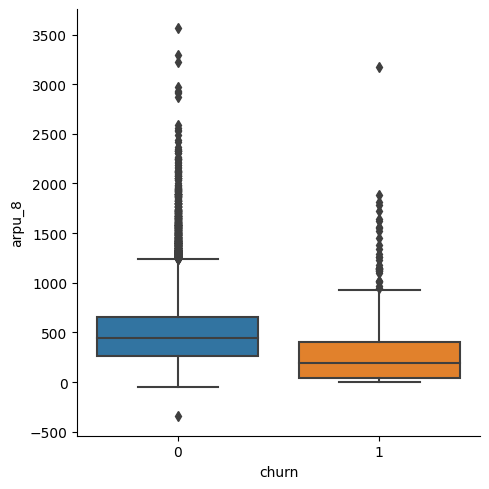

In [256]:
sns.catplot(x="churn", y="arpu_8", kind='box', data=filtered_data);

#CONCLUSION

Our objective was to build two models
1. in which one was to predict if the high values customer will churn or nowt
2. other was to identify important variables that are stropn predictors of churn.

#1. Predict if the high value customers will churn or not
1. We had 130+ columns and 14945 rows in the dataset at the start after performing the data cleaning and manipulation
2. After that we handled class imabalance using SMOTE technique and had 136 columns in the dataset
3. We ran our first logistic regression and got an accuracy and recall of 85% and 87% approximately on train set
4. The same logistic regression was not satisfying the test data as it had accuracy and recall of about 81% and 71%.
A5. s we had a lot of features so we used PCA on the data which reduced the features to 58 explaining 96% of variance.
6. Moving further we applied Logistic Regression on the data undergone PCA and were driven by an accuracy of 80% and recall of 78% on test data
7. Moreover, we performed hyperparameter tuning using Grid searchCV which resulted in an accuracy of 80% and recall of 79%
8. Then we tried another hyperparameter in Logistic Regression-class_weight. So instead of using SMOTE, we performed PCA and selected features explaing 97% variance(~69 principle components).
9. Performed hyper parameter tuning of C and class weight using GridSearchCV and built a model with 72% accuracy and 84% recall.
10. Since we want to correctly predit Churned customers, we selected model with higher recall and compromised a little on accuracy. So our final prediction model is Logistic regression with custom class_weight hyperparameter .

#2. Model for identifying features driving Churn

1. First we build the Decision tree with max_depth=5 and other parameters and default, we got an accuracy of 80% and recall of 60%
2. We performed hyperparameter tuning using Grid Search CV and obtained a best score of 90% with an accuracy of 86%
3. Random forest model was used to train the data and hyperparameter tuning of max_depth, min_samples leaf, min_samples_split and max_feature gave us a recall of approximately 89% and accuracy of 88%.
4. This model was used to predict the best features that were strong predictors of churning of the customers
5. The driving features are:

•	roam_ic_mou_8
•	roam_og_mou_8
•	loc_ic_mou_8
•	loc_ic_t2m_mou_8
•	drop_in_arpu_8
•	max_rech_amt_8
•	total_ic_mou_8
•	roam_og_mou_7
•	week_of_last_rech_8
•	arpu_8













#Recommend strategies to handle Churn
1. Identify customers likely to churn using above parameters then give them offers/discounts to retain them.
2. Service provider should check recent complaints from these customers and see if they are facing any particular issues and assure them the resolution along with some benefits.
3. Service provider can also make feedback calls to get the customer feedback and decide strategy to retain them.
4. Based on the customer data and call usage and recharge history, provide them offers in that recharge segments.
5. Provide customized budget roaming packs if customers frequently uses roaming services.